In [745]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import plotly.express as px #plotting


In [746]:
#reading the data
loan_data = pd.read_csv("loan.csv")

#Since all columns do not show up
pd.set_option('display.max_columns', None)


/var/folders/c4/0697vh8d0dd6f0sw_k6b0f6shh0s4z/T/ipykernel_61319/911511146.py:2: DtypeWarning:

Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.



In [747]:
#Check the top 5
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [748]:
#Check the shape
loan_data.shape

(39717, 111)

In [749]:
#Get the list of all columns that have null values only
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [750]:
### There are columns with null values lets clean them up

loan_data.dropna(axis=1, how="all", inplace=True)

In [751]:
#### There were 111 columns earlier now they come down to 57 
loan_data.shape 

(39717, 57)

In [752]:
#### Dig into more data the idea is to findout those columns that have only one value
loan_data.head(50)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0   1077501    1296599       5000         5000       4975.00000   36 months   
1   1077430    1314167       2500         2500       2500.00000   60 months   
2   1077175    1313524       2400         2400       2400.00000   36 months   
3   1076863    1277178      10000        10000      10000.00000   36 months   
4   1075358    1311748       3000         3000       3000.00000   60 months   
5   1075269    1311441       5000         5000       5000.00000   36 months   
6   1069639    1304742       7000         7000       7000.00000   60 months   
7   1072053    1288686       3000         3000       3000.00000   36 months   
8   1071795    1306957       5600         5600       5600.00000   60 months   
9   1071570    1306721       5375         5375       5350.00000   60 months   
10  1070078    1305201       6500         6500       6500.00000   60 months   
11  1069908    1305008      12000        12000      12000.00000   36 months   
12  1064687    1298717       9000         9000       9000.00000   36 months   
13  1069866    1304956       3000         3000       3000.00000   36 months   
14  1069057    1303503      10000        10000      10000.00000   36 months   
15  1069759    1304871       1000         1000       1000.00000   36 months   
16  1065775    1299699      10000        10000      10000.00000   36 months   
17  1069971    1304884       3600         3600       3600.00000   36 months   
18  1062474    1294539       6000         6000       6000.00000   36 months   
19  1069742    1304855       9200         9200       9200.00000   36 months   
20  1069740    1284848      20250        20250      19142.16108   60 months   
21  1039153    1269083      21000        21000      21000.00000   36 months   
22  1069710    1304821      10000        10000      10000.00000   36 months   
23  1069700    1304810      10000        10000      10000.00000   36 months   
24  1069559    1304634       6000         6000       6000.00000   36 months   
25  1069697    1273773      15000        15000      15000.00000   36 months   
26  1069800    1304679      15000        15000       8725.00000   36 months   
27  1069657    1304764       5000         5000       5000.00000   60 months   
28  1069799    1304678       4000         4000       4000.00000   36 months   
29  1047704    1278806       8500         8500       8500.00000   36 months   
30  1032111    1261745       4375         4375       4375.00000   36 months   
31  1069539    1304608      31825        31825      31825.00000   36 months   
32  1065420    1299514      10000        10000       9975.00000   60 months   
33  1069591    1304289       5000         5000       5000.00000   36 months   
34  1069530    1291365       7000         7000       7000.00000   36 months   
35  1069522    1304589      12400        12400      12400.00000   36 months   
36  1069361    1304255      10800        10800      10800.00000   36 months   
37  1069357    1304251      15000        15000      15000.00000   36 months   
38  1069356    1304250       6000         6000       6000.00000   36 months   
39  1069346    1304237      12500        12500      12475.00000   60 months   
40  1067573    1301955       9600         9600       9600.00000   36 months   
41  1069506    1304567      12000        12000      12000.00000   36 months   
42  1069314    1304202       3000         3000       3000.00000   36 months   
43  1060578    1292332       4400         4400       4400.00000   36 months   
44  1069469    1304526       6000         6000       6000.00000   36 months   
45  1051117    1282787      14000        14000      14000.00000   36 months   
46  1069465    1304521       5000         5000       5000.00000   36 months   
47  1069283    1304166      10000        10000      10000.00000   36 months   
48  1069287    1304171      10000        10000      10000.00000   36 months   
49  1069453    1303701      11000        11000      11000.0

In [753]:
# Check the values
loan_data.next_pymnt_d.value_counts() 



next_pymnt_d
Jun-16    1125
Jul-16      15
Name: count, dtype: int64

In [754]:
# Column collections_12_mths_ex_med can be deleted since this wont add anything significant to the analysis
loan_data.collections_12_mths_ex_med.value_counts() 



collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64

In [755]:
# Column policy_code can be deleted since this wont add anything significant to the analysis
loan_data.policy_code.value_counts() 


policy_code
1    39717
Name: count, dtype: int64

In [756]:
# Column application_type and can be deleted since this wont add anything significant to the analysis
loan_data.application_type.value_counts() 


application_type
INDIVIDUAL    39717
Name: count, dtype: int64

In [757]:
# Column acc_now_delinq can be deleted since this wont add anything significant to the analysis
loan_data.acc_now_delinq.value_counts() 


acc_now_delinq
0    39717
Name: count, dtype: int64

In [758]:
# Column chargeoff_within_12_mths can be deleted since this wont add anything significant to the analysis
loan_data.chargeoff_within_12_mths.value_counts() 


chargeoff_within_12_mths
0.0    39661
Name: count, dtype: int64

In [759]:
#Column delinq_amnt can be deleted since this wont add anything significant to the analysis
loan_data.delinq_amnt.value_counts()  


delinq_amnt
0    39717
Name: count, dtype: int64

In [760]:
#Column pub_rec_bankruptcies can be deleted since this wont add anything significant to the analysis
loan_data.pub_rec_bankruptcies.value_counts() 


pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [761]:
# Column tax_liens can be deleted since this wont add anything significant to the analysis
loan_data.tax_liens.value_counts() 

tax_liens
0.0    39678
Name: count, dtype: int64

In [762]:
#drop all columns that were identified above
loan_data.drop(["collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","pub_rec_bankruptcies","tax_liens"], axis=1, inplace=True)

In [763]:
#sneak the data post cleanup
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [764]:
# Column pymnt_plan can be deleted since this wont add anything significant to the analysis
loan_data.pymnt_plan.value_counts() 

pymnt_plan
n    39717
Name: count, dtype: int64

In [765]:
# Delete pymnt_plan
loan_data.drop(["pymnt_plan"], axis=1, inplace=True)

In [766]:
# Recheck the DF Frame
loan_data.shape

(39717, 48)

In [767]:
# Recheck the new DF
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

                                                 url  \
0  https://lendingclub.com/browse/loanDetail.acti...   
1  https://lendingclub.com/browse/loanDetail.acti...   
2  https://lendingclub.com/browse/loanDetail.acti...   
3  https://lendingclub.com/browse/loanDetail.acti...   
4  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435

In [770]:
# Check the uniqueness of columns for santity and if they could be cleaned up
loan_data.loan_amnt.value_counts()

loan_amnt
10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: count, Length: 885, dtype: int64

In [771]:
# Check the data of columns for santity and if they could be cleaned up further
loan_data.funded_amnt.value_counts()

funded_amnt
10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
26250       1
24725       1
31750       1
22625       1
22350       1
Name: count, Length: 1041, dtype: int64

In [772]:
# Check the data of columns for santity and if they could be cleaned up further
loan_data.funded_amnt_inv.value_counts()


funded_amnt_inv
5000.000000     1309
10000.000000    1275
6000.000000     1200
12000.000000    1069
8000.000000      900
                ... 
4944.213109        1
18400.281660       1
14659.820000       1
6294.151315        1
11808.924370       1
Name: count, Length: 8205, dtype: int64

In [773]:
# Check the data of columns for santity and if they could be cleaned up further
loan_data.term.value_counts()

term
36 months    29096
60 months    10621
Name: count, dtype: int64

In [548]:
# Check the data of columns for santity and if they could be cleaned up further
loan_data.int_rate.value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [774]:
#Check the data of columns for santity and if they could be cleaned up further

loan_data.installment.value_counts()

installment
311.11     68
180.96     59
311.02     54
150.80     48
368.45     46
           ..
1224.46     1
63.44       1
157.67      1
492.34      1
255.43      1
Name: count, Length: 15383, dtype: int64

In [775]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.grade.value_counts()


grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64

In [776]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.sub_grade.value_counts()


sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64

In [777]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.emp_title.value_counts()


emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

In [778]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.home_ownership.value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64

In [779]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.annual_inc.value_counts()


annual_inc
60000.0    1505
50000.0    1057
40000.0     876
45000.0     830
30000.0     825
           ... 
56820.0       1
45314.0       1
53913.0       1
62880.0       1
27376.0       1
Name: count, Length: 5318, dtype: int64

In [780]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.verification_status.value_counts()


verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64

In [781]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.loan_status.value_counts()


loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [782]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.issue_d.value_counts()


issue_d
Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Jul-11    1870
Jun-11    1827
May-11    1689
Apr-11    1562
Mar-11    1443
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

In [783]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.url.value_counts()


url
https://lendingclub.com/browse/loanDetail.action?loan_id=1077501    1
https://lendingclub.com/browse/loanDetail.action?loan_id=568534     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=567165     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568531     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=785667     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785630     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785626     1
https://lendingclub.com/browse/loanDetail.action?loan_id=87023      1
Name: count, Length: 39717, dtype: int64

In [784]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.desc.value_counts()


desc
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           210
Debt Consolidation                                                                                                                                                                  

In [785]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.title.value_counts()

title
Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: count, Length: 19615, dtype: int64

In [786]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.zip_code.value_counts()

zip_code
100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: count, Length: 823, dtype: int64

In [787]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.addr_state.value_counts()


addr_state
CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64

In [788]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.dti.value_counts()


dti
0.00     183
12.00     51
18.00     45
19.20     40
13.20     39
        ... 
29.13      1
25.31      1
29.76      1
28.42      1
25.43      1
Name: count, Length: 2868, dtype: int64

In [789]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.earliest_cr_line.value_counts()	


earliest_cr_line
Nov-98    370
Oct-99    366
Dec-98    348
Oct-00    346
Dec-97    329
         ... 
Feb-66      1
Dec-61      1
Oct-54      1
Jun-72      1
Oct-74      1
Name: count, Length: 526, dtype: int64

In [790]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.delinq_2yrs.value_counts()


delinq_2yrs
0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64

In [791]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.inq_last_6mths.value_counts()


inq_last_6mths
0    19300
1    10971
2     5812
3     3048
4      326
5      146
6       64
7       35
8       15
Name: count, dtype: int64

In [792]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.mths_since_last_delinq.value_counts()


mths_since_last_delinq
0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: count, Length: 95, dtype: int64

In [793]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.mths_since_last_record.value_counts()


mths_since_last_record
0.0      670
104.0     61
89.0      60
113.0     59
111.0     57
        ... 
19.0       1
20.0       1
120.0      1
129.0      1
5.0        1
Name: count, Length: 111, dtype: int64

In [794]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.open_acc.value_counts()

open_acc
7     4018
6     3946
8     3936
9     3718
10    3223
5     3183
11    2746
4     2343
12    2273
13    1911
3     1493
14    1487
15    1177
16     940
17     741
2      605
18     533
19     396
20     289
21     244
22     143
23      97
24      81
25      55
26      34
28      25
27      22
30      15
29      13
31       7
34       5
32       4
35       4
33       3
36       2
39       1
38       1
44       1
41       1
42       1
Name: count, dtype: int64

In [795]:
# Check the data of columns for santity and if they could be cleaned up further
 
loan_data.pub_rec.value_counts()	


pub_rec
0    37601
1     2056
2       51
3        7
4        2
Name: count, dtype: int64

In [796]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.revol_bal.value_counts()


revol_bal
0        994
298       14
255       14
1         12
682       11
        ... 
21424      1
30747      1
23862      1
20197      1
85607      1
Name: count, Length: 21711, dtype: int64

In [797]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.revol_util.value_counts()


revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1089, dtype: int64

In [798]:
# Check the data of columns for santity and if they could be cleaned up further

loan_data.total_acc.value_counts()


total_acc
16    1471
15    1462
17    1457
14    1445
20    1428
      ... 
74       1
77       1
78       1
87       1
90       1
Name: count, Length: 82, dtype: int64

In [799]:
# Check the data of columns for santity and if they could be cleaned up further
# This has only one value do we need it ?
loan_data.initial_list_status.value_counts() 


initial_list_status
f    39717
Name: count, dtype: int64

In [800]:
# Dig into more data to check for anomalies 
loan_data.head(50)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0   1077501    1296599       5000         5000       4975.00000   36 months   
1   1077430    1314167       2500         2500       2500.00000   60 months   
2   1077175    1313524       2400         2400       2400.00000   36 months   
3   1076863    1277178      10000        10000      10000.00000   36 months   
4   1075358    1311748       3000         3000       3000.00000   60 months   
5   1075269    1311441       5000         5000       5000.00000   36 months   
6   1069639    1304742       7000         7000       7000.00000   60 months   
7   1072053    1288686       3000         3000       3000.00000   36 months   
8   1071795    1306957       5600         5600       5600.00000   60 months   
9   1071570    1306721       5375         5375       5350.00000   60 months   
10  1070078    1305201       6500         6500       6500.00000   60 months   
11  1069908    1305008      12000        12000      12000.00000   36 months   
12  1064687    1298717       9000         9000       9000.00000   36 months   
13  1069866    1304956       3000         3000       3000.00000   36 months   
14  1069057    1303503      10000        10000      10000.00000   36 months   
15  1069759    1304871       1000         1000       1000.00000   36 months   
16  1065775    1299699      10000        10000      10000.00000   36 months   
17  1069971    1304884       3600         3600       3600.00000   36 months   
18  1062474    1294539       6000         6000       6000.00000   36 months   
19  1069742    1304855       9200         9200       9200.00000   36 months   
20  1069740    1284848      20250        20250      19142.16108   60 months   
21  1039153    1269083      21000        21000      21000.00000   36 months   
22  1069710    1304821      10000        10000      10000.00000   36 months   
23  1069700    1304810      10000        10000      10000.00000   36 months   
24  1069559    1304634       6000         6000       6000.00000   36 months   
25  1069697    1273773      15000        15000      15000.00000   36 months   
26  1069800    1304679      15000        15000       8725.00000   36 months   
27  1069657    1304764       5000         5000       5000.00000   60 months   
28  1069799    1304678       4000         4000       4000.00000   36 months   
29  1047704    1278806       8500         8500       8500.00000   36 months   
30  1032111    1261745       4375         4375       4375.00000   36 months   
31  1069539    1304608      31825        31825      31825.00000   36 months   
32  1065420    1299514      10000        10000       9975.00000   60 months   
33  1069591    1304289       5000         5000       5000.00000   36 months   
34  1069530    1291365       7000         7000       7000.00000   36 months   
35  1069522    1304589      12400        12400      12400.00000   36 months   
36  1069361    1304255      10800        10800      10800.00000   36 months   
37  1069357    1304251      15000        15000      15000.00000   36 months   
38  1069356    1304250       6000         6000       6000.00000   36 months   
39  1069346    1304237      12500        12500      12475.00000   60 months   
40  1067573    1301955       9600         9600       9600.00000   36 months   
41  1069506    1304567      12000        12000      12000.00000   36 months   
42  1069314    1304202       3000         3000       3000.00000   36 months   
43  1060578    1292332       4400         4400       4400.00000   36 months   
44  1069469    1304526       6000         6000       6000.00000   36 months   
45  1051117    1282787      14000        14000      14000.00000   36 months   
46  1069465    1304521       5000         5000       5000.00000   36 months   
47  1069283    1304166      10000        10000      10000.00000   36 months   
48  1069287    1304171      10000        10000      10000.00000   36 months   
49  1069453    1303701      11000        11000      11000.0

In [801]:
# Check the data of columns for santity and if they could be cleaned up further
loan_data.out_prncp.value_counts()


out_prncp
0.00       38577
1972.60        2
827.13         2
2277.11        2
2963.24        2
           ...  
782.23         1
2296.41        1
1928.85        1
1061.32        1
79.24          1
Name: count, Length: 1137, dtype: int64

In [802]:
# Check the data of columns for santity and if they could be cleaned up further
loan_data.out_prncp_inv.value_counts()


out_prncp_inv
0.00       38577
1972.60        2
1664.64        2
827.13         2
1863.21        1
           ...  
782.23         1
2289.14        1
1928.85        1
1061.32        1
79.24          1
Name: count, Length: 1138, dtype: int64

In [803]:
# Check the data of columns for santity and if they could be cleaned up further
loan_data.total_pymnt.value_counts()


total_pymnt
11196.569430    26
0.000000        16
11784.232230    16
10956.775960    16
5478.387981     15
                ..
17768.430010     1
12794.806580     1
6193.803706      1
34797.769170     1
9195.263334      1
Name: count, Length: 37850, dtype: int64

In [804]:
# Check the data of columns for santity and if they could be cleaned up further
loan_data.total_pymnt_inv.value_counts()


total_pymnt_inv
0.00        165
6514.52      16
5478.39      14
13148.14     14
11196.57     12
           ... 
17702.50      1
19026.06      1
7355.24       1
387.55        1
980.83        1
Name: count, Length: 37518, dtype: int64

In [805]:
# Check the data of columns for santity and if they could be cleaned up further
loan_data.total_rec_prncp.value_counts()


total_rec_prncp
10000.00    2293
12000.00    1805
5000.00     1702
6000.00     1637
15000.00    1400
            ... 
1097.81        1
1410.30        1
6968.65        1
3477.49        1
16077.42       1
Name: count, Length: 7976, dtype: int64

In [806]:
# Check the data of columns for santity and if they could be cleaned up further
loan_data.total_rec_int.value_counts()


total_rec_int
0.00       71
1196.57    26
514.52     19
956.78     17
1784.23    17
           ..
494.53      1
1119.88     1
62.31       1
2656.10     1
1695.26     1
Name: count, Length: 35148, dtype: int64

In [807]:
# Check the data of columns for santity and if they could be cleaned up further
loan_data.total_rec_late_fee.value_counts()


total_rec_late_fee
0.000000     37671
15.000000      255
15.000000       58
30.000000       55
15.000000       47
             ...  
35.286832        1
15.000000        1
14.777500        1
14.967774        1
19.890000        1
Name: count, Length: 1356, dtype: int64

In [808]:
# Check the data of columns for santity and if they could be cleaned up further
loan_data.recoveries.value_counts()


recoveries
0.00       35499
11.29          4
10.40          4
10.66          3
44.92          3
           ...  
764.69         1
653.08         1
1080.96        1
878.19         1
21.29          1
Name: count, Length: 4040, dtype: int64

In [809]:
# Check the data of columns for santity and if they could be cleaned up further
loan_data.collection_recovery_fee.value_counts()


collection_recovery_fee
0.0000      35935
2.0000         12
1.2000         10
3.7100          9
1.8800          8
            ...  
3.7900          1
773.4900        1
272.8250        1
1.7697          1
0.2300          1
Name: count, Length: 2616, dtype: int64

In [810]:
# Check the data of columns for santity and if they could be cleaned up further
loan_data.last_pymnt_d.value_counts()


last_pymnt_d
May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: count, Length: 101, dtype: int64

In [811]:
# Check the data of columns for santity and if they could be cleaned up further
loan_data.last_pymnt_amnt.value_counts()


last_pymnt_amnt
0.00       74
276.06     21
200.00     17
50.00      16
100.00     15
           ..
1763.87     1
172.27      1
889.67      1
150.73      1
256.59      1
Name: count, Length: 34930, dtype: int64

In [812]:
# Check the data of columns for santity and if they could be cleaned up further
loan_data.next_pymnt_d.value_counts()


next_pymnt_d
Jun-16    1125
Jul-16      15
Name: count, dtype: int64

In [813]:
# Check the data of columns for santity and if they could be cleaned up further
loan_data.last_credit_pull_d.value_counts()

last_credit_pull_d
May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
          ...  
May-08        1
Jun-08        1
Jul-08        1
May-07        1
Jul-07        1
Name: count, Length: 106, dtype: int64

In [814]:
#Re-Check Shape
loan_data.shape

(39717, 48)

In [816]:
## Our objective is to identify the user details and the driving factor of loan defaulting before approving the loan
## I see some columns that do not make sense when we want to findout the reasons for loan defaulting 
## I believe I can safely remove some of them 

## 1. id, member_id, emp_title, zip_code, last_credit_pull_d, addr_state can be removed since they have no say in determining if someone could default
## 2. out_prncp_inv & total_pymnt_inv are more on investors remove them


In [817]:
# Delete columns that do not help in achieving the objective that we require
loan_data.drop(["id","member_id","emp_title","zip_code","last_credit_pull_d","addr_state"], axis=1, inplace=True)

In [818]:
# Recheck Shape
loan_data.shape

(39717, 42)

In [819]:
# Check what columns are left and go to the sheet for their definition


loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url',
       'desc', 'purpose', 'title', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d'],
      dtype='object')

In [820]:
#1.  loan_amnt	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
#2.  annual_inc	The self-reported annual income provided by the borrower during registration.
#3.  collection_recovery_fee	post charge off collection fee
#4.  delinq_2yrs	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
#5.  desc	Loan description provided by the borrower
#6.  dti	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
#7.  earliest_cr_line	The month the borrower's earliest reported credit line was opened
#8.  emp_length	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
#9.  funded_amnt	The total amount committed to that loan at that point in time.
#10. funded_amnt_inv	The total amount committed by investors for that loan at that point in time.
#11. grade	LC assigned loan grade
#12. home_ownership	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
#13. initial_list_status	The initial listing status of the loan. Possible values are – W, F
#14. installment	The monthly payment owed by the borrower if the loan originates.
#15. int_rate	Interest Rate on the loan
#16. issue_d	The month which the loan was funded
#17. last_pymnt_amnt	Last total payment amount received
#18. last_pymnt_d	Last month payment was received
#19. loan_status	Current status of the loan
#20. next_pymnt_d	Next scheduled payment date
#21. open_acc	The number of open credit lines in the borrower's credit file.
#22. out_prncp	Remaining outstanding principal for total amount funded
#23. out_prncp_inv	Remaining outstanding principal for portion of total amount funded by investors
#24. pub_rec	Number of derogatory public records
#25. purpose	A category provided by the borrower for the loan request. 
#26. recoveries	post charge off gross recovery
#27. revol_bal	Total credit revolving balance
#28. revol_util	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
#29. sub_grade	LC assigned loan subgrade
#30. term	The number of payments on the loan. Values are in months and can be either 36 or 60.
#31. title	The loan title provided by the borrower
#32. total_acc	The total number of credit lines currently in the borrower's credit file
#33. total_pymnt	Payments received to date for total amount funded
#34. total_pymnt_inv	Payments received to date for portion of total amount funded by investors
#35. total_rec_int	Interest received to date
#36. total_rec_late_fee	Late fees received to date
#37. total_rec_prncp	Principal received to date
#38. url	URL for the LC page with listing data.
#39. verification_status	Indicates if income was verified by LC, not verified, or if the income source was verified
#40 chargeoff_within_12_mths	Number of charge-offs within 12 months									


In [821]:

loan_data.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0       5000         5000           4975.0   36 months   10.65%       162.87   
1       2500         2500           2500.0   60 months   15.27%        59.83   
2       2400         2400           2400.0   36 months   15.96%        84.33   
3      10000        10000          10000.0   36 months   13.49%       339.31   
4       3000         3000           3000.0   60 months   12.69%        67.79   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   
3     C        C1  10+ years           RENT     49200.0     Source Verified   
4     B        B5     1 year           RENT     80000.0     Source Verified   

  issue_d  loan_status                                                url  \
0  Dec-11   Fully Paid  https://lendingclub.com/browse/loanDetail.acti...   
1  Dec-11  Charged Off  https://lendingclub.com/browse/loanDetail.acti...   
2  Dec-11   Fully Paid  https://lendingclub.com/browse/loanDetail.acti...   
3  Dec-11   Fully Paid  https://lendingclub.com/browse/loanDetail.acti...   
4  Dec-11      Current  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0              Computer  27.65            0           Jan-85               1   
1                  bike   1.00            0           Apr-99               5   
2  real estate business   8.72            0           Nov-01               2   
3              personel  20.00            0           Feb-96               1   
4              Personal  17.94            0           Jan-96               0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN         3        0   
1                     NaN                     NaN         3        0   
2                     NaN                     NaN         2        0   
3                    35.0                     NaN        10        0   
4                    38.0                     NaN        15        0   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0      13648     83.70%          9                   f       0.00   
1       1687      9.40%          4                   f       0.00   
2       2956     98.50%         10                   f       0.00   
3       5598        21%         37                   f       0.00   
4      27783     53.90%         38                   f     524.06   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0           0.00   5863.155187          5833.84          5000.00   
1           0.00   1008.710000          1008.71           456.46   
2           0.00   3005.666844          3005.67          2400.00   
3           0.00  12231.890000         12231.89         10000.00   
4         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39            

In [828]:
#Lets clean up some of the columns that do not make sense
#5.  desc	Loan description provided by the borrower
#38. url	URL for the LC page with listing data.

loan_data.drop(["url","desc"], axis=1, inplace=True)

KeyError: "['url', 'desc'] not found in axis"

In [829]:
#out_prncp_inv & total_pymnt_inv are more on investors remove them
#23. out_prncp_inv	Remaining outstanding principal for portion of total amount funded by investors
#34. total_pymnt_inv	Payments received to date for portion of total amount funded by investors
loan_data.drop(["out_prncp_inv","total_pymnt_inv"], axis=1, inplace=True)

KeyError: "['out_prncp_inv', 'total_pymnt_inv'] not found in axis"

In [830]:
loan_data.shape

(39717, 36)

In [831]:
loan_data.head()

loan_amnt  funded_amnt_inv        term int_rate  installment grade  \
0       5000           4975.0   36 months   10.65%       162.87     B   
1       2500           2500.0   60 months   15.27%        59.83     C   
2       2400           2400.0   36 months   15.96%        84.33     C   
3      10000          10000.0   36 months   13.49%       339.31     C   
4       3000           3000.0   60 months   12.69%        67.79     B   

  sub_grade emp_length home_ownership  annual_inc verification_status issue_d  \
0        B2  10+ years           RENT     24000.0            Verified  Dec-11   
1        C4   < 1 year           RENT     30000.0     Source Verified  Dec-11   
2        C5  10+ years           RENT     12252.0        Not Verified  Dec-11   
3        C1  10+ years           RENT     49200.0     Source Verified  Dec-11   
4        B5     1 year           RENT     80000.0     Source Verified  Dec-11   

   loan_status         purpose    dti  delinq_2yrs earliest_cr_line  \
0   Fully Paid     credit_card  27.65            0           Jan-85   
1  Charged Off             car   1.00            0           Apr-99   
2   Fully Paid  small_business   8.72            0           Nov-01   
3   Fully Paid           other  20.00            0           Feb-96   
4      Current           other  17.94            0           Jan-96   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0               1                     NaN                     NaN         3   
1               5                     NaN                     NaN         3   
2               2                     NaN                     NaN         2   
3               1                    35.0                     NaN        10   
4               0                    38.0                     NaN        15   

   pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0        0      13648     83.70%          9                   f       0.00   
1        0       1687      9.40%          4                   f       0.00   
2        0       2956     98.50%         10                   f       0.00   
3        0       5598        21%         37                   f       0.00   
4        0      27783     53.90%         38                   f     524.06   

    total_pymnt  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0   5863.155187          5000.00         863.16                0.00   
1   1008.710000           456.46         435.17                0.00   
2   3005.666844          2400.00         605.67                0.00   
3  12231.890000         10000.00        2214.92               16.97   
4   3513.330000          2475.94        1037.39                0.00   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0        0.00                     0.00       Jan-15           171.62   
1      117.08                     1.11       Apr-13           119.66   
2        0.00                     0.00       Jun-14           649.91   
3        0.00                     0.00       Jan-15           357.48   
4        0.00                     0.00       May-16            67.79   

  next_pymnt_d  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4       Jun-16

In [832]:
# funded amount and funded_amount investor column I think the first one could be removed does no harm in keeping it but doesnt add any value so will remove
loan_data.drop(["funded_amnt","title"], axis=1, inplace=True)

KeyError: "['funded_amnt', 'title'] not found in axis"

In [833]:
loan_data.columns


Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d'],
      dtype='object')

In [602]:
## Post Approval Details 
## 01. delinq_2yrs -> The number of 30+ days past-due incidences of delinquency in the borrower's credit file
##     for the past 2 years
## 27. revol_bal-> Total credit revolving balance
## 22. out_prncp-> Remaining outstanding principal for total amount funded
## 33. total_pymnt-> Payments received to date for total amount funded
## 37. total_rec_prncp-> Principal received to date
## 35. total_rec_int-> Interest received to date
## 36. total_rec_late_fee-> Late fees received to date
## 26. recoveries-> post charge off gross recovery
## 03. collection_recovery_fee-> post charge off collection fee
## 18. last_pymnt_d	Last month payment was received
## 17. last_pymnt_amnt	Last total payment amount received
## 20. next_pymnt_d	Next scheduled payment date
## 40. chargeoff_within_12_mths	Number of charge-offs within 12 months
## 52. mths_since_last_delinq	The number of months since the borrower's last delinquency.
## 54. mths_since_last_record	The number of months since the last public record.
## 06. dti	A ratio calculated using the borrower’s total monthly debt payments on the total debt 
##     obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [834]:
## Delete all the columns that come into picture post the loan is disbursed
loan_data.drop(["delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" ,  "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)


In [835]:
loan_data.shape

(39717, 22)

In [836]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'initial_list_status'],
      dtype='object')

In [ ]:
## Assumption that these columns should be used for digging into who can be allowed or denied loan
#01. loan_amnt	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
#10. funded_amnt_inv	The total amount committed by investors for that loan at that point in time.
#30. term	The number of payments on the loan. Values are in months and can be either 36 or 60.
#15. int_rate	Interest Rate on the loan
#14. installment	The monthly payment owed by the borrower if the loan originates.
#11. grade	LC assigned loan grade
#29. sub_grade	LC assigned loan subgrade
#08. emp_length	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
#12. home_ownership	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
#02. annual_inc	The self-reported annual income provided by the borrower during registration.
#39. verification_status	Indicates if income was verified by LC, not verified, or if the income source was verified
#16. issue_d	The month which the loan was funded
#44. loan_status	Current status of the loan
#25. purpose	A category provided by the borrower for the loan request. 
#06. dti	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
#07. earliest_cr_line	The month the borrower's earliest reported credit line was opened
#08. inq_last_6mths	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)									
#75. open_acc	The number of open credit lines in the borrower's credit file.									
#87. pub_rec	Number of derogatory public records									
#93. revol_util	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.									
#101.total_acc	The total number of credit lines currently in the borrower's credit file									
#31. initial_list_status	The initial listing status of the loan. Possible values are – W, F									


In [837]:
#Get a sneakpeak
loan_data.head()

loan_amnt  funded_amnt_inv        term int_rate  installment grade  \
0       5000           4975.0   36 months   10.65%       162.87     B   
1       2500           2500.0   60 months   15.27%        59.83     C   
2       2400           2400.0   36 months   15.96%        84.33     C   
3      10000          10000.0   36 months   13.49%       339.31     C   
4       3000           3000.0   60 months   12.69%        67.79     B   

  sub_grade emp_length home_ownership  annual_inc verification_status issue_d  \
0        B2  10+ years           RENT     24000.0            Verified  Dec-11   
1        C4   < 1 year           RENT     30000.0     Source Verified  Dec-11   
2        C5  10+ years           RENT     12252.0        Not Verified  Dec-11   
3        C1  10+ years           RENT     49200.0     Source Verified  Dec-11   
4        B5     1 year           RENT     80000.0     Source Verified  Dec-11   

   loan_status         purpose    dti earliest_cr_line  inq_last_6mths  \
0   Fully Paid     credit_card  27.65           Jan-85               1   
1  Charged Off             car   1.00           Apr-99               5   
2   Fully Paid  small_business   8.72           Nov-01               2   
3   Fully Paid           other  20.00           Feb-96               1   
4      Current           other  17.94           Jan-96               0   

   open_acc  pub_rec revol_util  total_acc initial_list_status  
0         3        0     83.70%          9                   f  
1         3        0      9.40%          4                   f  
2         2        0     98.50%         10                   f  
3        10        0        21%         37                   f  
4        15        0     53.90%         38                   f

In [838]:
#Get the Loan Status Values
loan_data.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [839]:
# remove the data that says current loan since that is already active
loan_data = loan_data[loan_data!="Current" ]

In [841]:
# recheck what are the values now
loan_data.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [842]:
## We not have a clean data set now lets check for the columns that have missing values so we can clean them up
## isna returns a boolean and sum sums up all the true values 
loan_data.isna().sum()


loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status            1140
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
initial_list_status       0
dtype: int64

In [612]:
#This gives the total number of records in the dataset
loan_data.index

RangeIndex(start=0, stop=39717, step=1)

In [613]:
# gives the count of the number of rows
len(loan_data.index)

39717

In [843]:
## Get the percentage of missing values in the data frame
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            2.870307
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.125891
total_acc              0.000000
initial_list_status    0.000000
dtype: float64

In [ ]:
# Need to analyse the non zero values and take a call on what needs to be done on with it

In [850]:
# EMP length has non zero values
loan_data.emp_length.value_counts(dropna=False)


emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
NaN          1075
Name: count, dtype: int64

In [848]:
#Print the non zero count on employee lenght
print(loan_data.loan_status.isnull().sum())


1140


In [618]:
# Checking the mode
print("Mode : " + loan_data.emp_length.mode()[0])


Mode : 10+ years


In [619]:
#The above value count shows that mode has a far higher frequency we can replace the nulls with mode value

In [851]:
loan_data.emp_length.value_counts()


emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [853]:
# Replace the mode value with missing values
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()


0

In [854]:
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             0.000000
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            2.870307
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.125891
total_acc              0.000000
initial_list_status    0.000000
dtype: float64

In [858]:
#Doesnt give me
loan_data.revol_util.value_counts(dropna=False)

revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1089, dtype: int64

In [856]:
# Remove all nulls 
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.revol_util.isna().sum()

0

In [625]:
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             0.000000
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            2.873925
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.000000
total_acc              0.000000
initial_list_status    0.000000
total_pymnt_inv        0.000000
dtype: float64

In [626]:
## one cannot analyse those rows that do not have a loan_status are these current /defaulted / or something else better remove them
loan_data.dropna(axis = 0, subset = ['loan_status'] , inplace = True)
loan_data.revol_util.isna().sum()

0

In [627]:
#Clean data set ready to be analysed
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt              0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
dti                    0.0
earliest_cr_line       0.0
inq_last_6mths         0.0
open_acc               0.0
pub_rec                0.0
revol_util             0.0
total_acc              0.0
initial_list_status    0.0
total_pymnt_inv        0.0
dtype: float64

In [628]:
# We have the data types here
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38527 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt_inv      38527 non-null  float64
 2   term                 38527 non-null  object 
 3   int_rate             38527 non-null  object 
 4   installment          38527 non-null  float64
 5   grade                38527 non-null  object 
 6   sub_grade            38527 non-null  object 
 7   emp_length           38527 non-null  object 
 8   home_ownership       38527 non-null  object 
 9   annual_inc           38527 non-null  float64
 10  verification_status  38527 non-null  object 
 11  issue_d              38527 non-null  object 
 12  loan_status          38527 non-null  object 
 13  purpose              38527 non-null  object 
 14  dti                  38527 non-null  float64
 15  earliest_cr_line     38527 non-null  obje

In [629]:
#Standardising the data now

#"revol_util" column has continous values that needs to be standardized
#"int_rate" is one such column.
#"emp_length" --> { less than 1 year make it 0 and over 10 years make it 10 }
#"term" is an integer, there are only two values in the whole column and it might as well be declared a categorical variable.

In [859]:
#Remove percentages
loan_data.revol_util = pd.to_numeric(loan_data.revol_util.apply(lambda x : x.split('%')[0]))


In [860]:
#Remove percentages
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))


In [861]:
loan_data.head()

loan_amnt  funded_amnt_inv        term  int_rate  installment grade  \
0       5000           4975.0   36 months     10.65       162.87     B   
1       2500           2500.0   60 months     15.27        59.83     C   
2       2400           2400.0   36 months     15.96        84.33     C   
3      10000          10000.0   36 months     13.49       339.31     C   
4       3000           3000.0   60 months     12.69        67.79     B   

  sub_grade emp_length home_ownership  annual_inc verification_status issue_d  \
0        B2  10+ years           RENT     24000.0            Verified  Dec-11   
1        C4   < 1 year           RENT     30000.0     Source Verified  Dec-11   
2        C5  10+ years           RENT     12252.0        Not Verified  Dec-11   
3        C1  10+ years           RENT     49200.0     Source Verified  Dec-11   
4        B5     1 year           RENT     80000.0     Source Verified  Dec-11   

   loan_status         purpose    dti earliest_cr_line  inq_last_6mths  \
0   Fully Paid     credit_card  27.65           Jan-85               1   
1  Charged Off             car   1.00           Apr-99               5   
2   Fully Paid  small_business   8.72           Nov-01               2   
3   Fully Paid           other  20.00           Feb-96               1   
4          NaN           other  17.94           Jan-96               0   

   open_acc  pub_rec  revol_util  total_acc initial_list_status  
0         3        0        83.7          9                   f  
1         3        0         9.4          4                   f  
2         2        0        98.5         10                   f  
3        10        0        21.0         37                   f  
4        15        0        53.9         38                   f

In [863]:
# We have fields less than zero and more than 10 or 10+ remove those so summation like operations can be applied
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))


In [864]:
loan_data.head()

loan_amnt  funded_amnt_inv        term  int_rate  installment grade  \
0       5000           4975.0   36 months     10.65       162.87     B   
1       2500           2500.0   60 months     15.27        59.83     C   
2       2400           2400.0   36 months     15.96        84.33     C   
3      10000          10000.0   36 months     13.49       339.31     C   
4       3000           3000.0   60 months     12.69        67.79     B   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2          10           RENT     24000.0            Verified   
1        C4           0           RENT     30000.0     Source Verified   
2        C5          10           RENT     12252.0        Not Verified   
3        C1          10           RENT     49200.0     Source Verified   
4        B5           1           RENT     80000.0     Source Verified   

  issue_d  loan_status         purpose    dti earliest_cr_line  \
0  Dec-11   Fully Paid     credit_card  27.65           Jan-85   
1  Dec-11  Charged Off             car   1.00           Apr-99   
2  Dec-11   Fully Paid  small_business   8.72           Nov-01   
3  Dec-11   Fully Paid           other  20.00           Feb-96   
4  Dec-11          NaN           other  17.94           Jan-96   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               0        15        0        53.9         38   

  initial_list_status  
0                   f  
1                   f  
2                   f  
3                   f  
4                   f

<Axes: ylabel='annual_inc'>

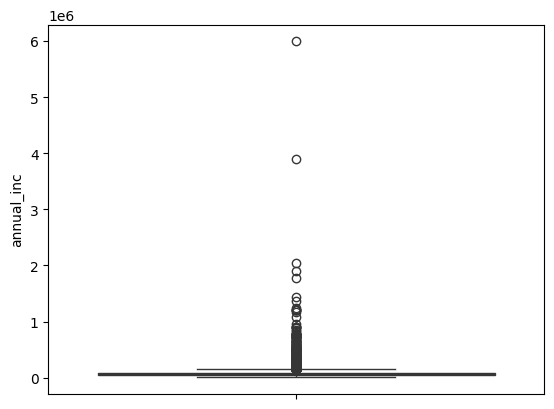

In [865]:
## During analysis finding out those records that are way too high or too low are called outliners lets use box plot
#Outliers
sea.boxplot(loan_data["annual_inc"])

In [866]:
#Clearly indicating the presence of outliers.
#So, Removing them.
#The values after 98 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
#So, considering threshold for removing outliers as 0.95


quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98, 0.99])
quantile_info

0.50     59000.00
0.75     82400.00
0.90    116000.00
0.91    120000.00
0.92    123000.00
0.93    128483.88
0.94    135000.00
0.95    142000.00
0.96    150000.00
0.97    165996.00
0.98    187000.00
0.99    234997.36
Name: annual_inc, dtype: float64

In [878]:
fig = px.histogram(loan_data, x="annual_inc")

fig.show()

array([    1,  6422, 12843, 19264, 25685, 32106, 38527])

In [639]:
px.box(loan_data,x='annual_inc',width=750,height=350,title='Distribution of Annual Income of the Borrower',labels={'annual_inc':'Annual Income'}).show()


In [879]:
## Removing outliers in annual_inc greater than 98th percentile
loan_data = loan_data[loan_data.annual_inc<=np.percentile(loan_data.annual_inc,98)]


In [880]:
per_98_annual_inc = loan_data['annual_inc'].quantile(0.98)


In [881]:
loan_data = loan_data[loan_data.annual_inc <= per_98_annual_inc]


In [882]:
loan_data.shape

(38117, 22)

<Axes: ylabel='annual_inc'>

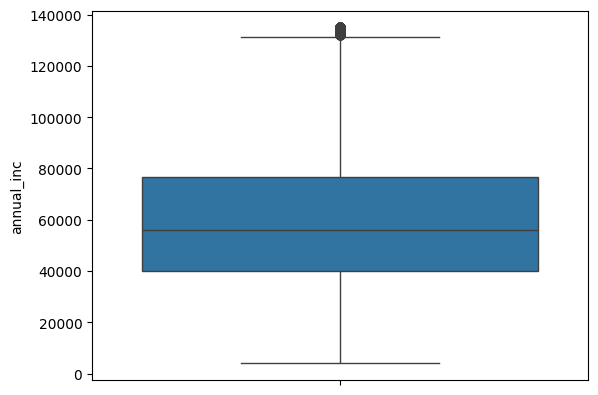

In [646]:
# Balanced data for annual inc in boxplot
sea.boxplot(loan_data.annual_inc)


In [883]:
px.box(loan_data,x='annual_inc',width=750,height=350,title='Annual Income of the Borrower',labels={'annual_inc':'Annual Income'}).show()


In [884]:
#Check DTI
px.box(loan_data,x='dti',width=750,height=350,title='DTI',labels={'dti':'DTI'}).show()


<Axes: ylabel='dti'>

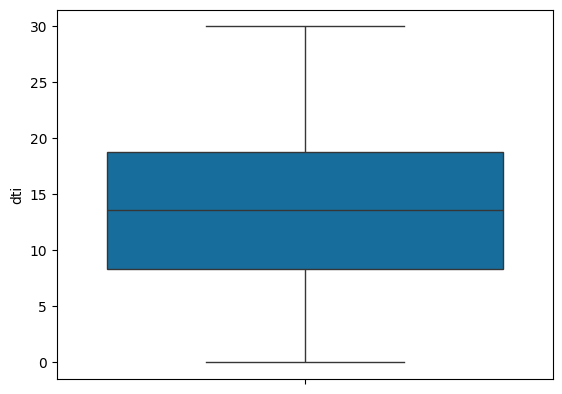

In [885]:
## Next numeric field is dti looks balanced nothing to change
sea.boxplot(loan_data.dti)


In [886]:
#Check box for Loan Amount
px.box(loan_data,x='loan_amnt',width=750,height=350,title='Loan Amount',labels={'annual_inc':'Loan Amount'}).show()


<Axes: ylabel='loan_amnt'>

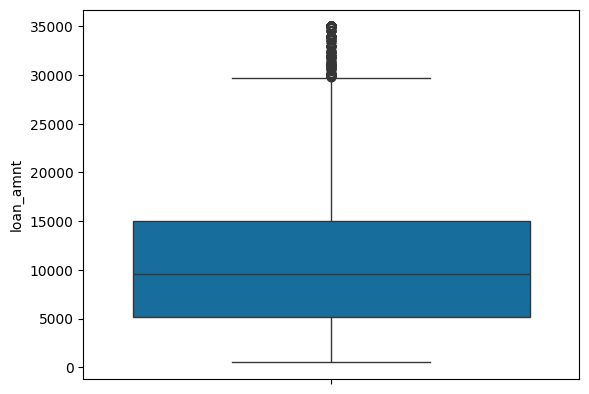

In [887]:
# Check box plot loan amount
sea.boxplot(loan_data.loan_amnt)


In [888]:
# Check loan amount quantile
loan_data.loan_amnt.quantile([0.75,0.90,0.95,0.96,0.97,0.975,0.98,0.985,0.99,0.995, 1.0])


0.750    15000.0
0.900    21000.0
0.950    25000.0
0.960    25000.0
0.970    28000.0
0.975    30000.0
0.980    30000.0
0.985    32500.0
0.990    35000.0
0.995    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

In [889]:
#Plot funded amount inventory
px.box(loan_data,x='funded_amnt_inv',width=750,height=350,title='Funded Amount Inv',labels={'funded_amnt_inv':'Funded Amount Inv'}).show()


<Axes: ylabel='funded_amnt_inv'>

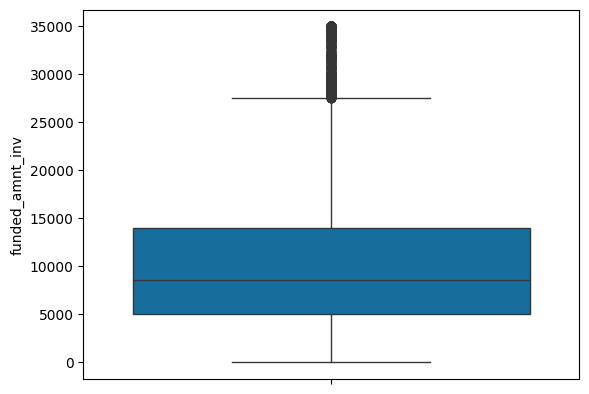

In [890]:
##Boxplot funded amount inventory
sea.boxplot(loan_data.funded_amnt_inv)


In [658]:
## Steady increase nothing to clean up
loan_data.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99,0.995, 1.0])


0.500     8325.000000
0.750    13544.794995
0.900    19725.000000
0.950    23867.498195
0.970    24975.000000
0.975    25000.000000
0.980    27762.518054
0.985    29872.450780
0.990    31821.459175
0.995    34950.000000
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

In [660]:
# Will not be removing funded amount inv nor the loan amount both are continuous 

In [661]:
loan_data.head()

loan_amnt  funded_amnt_inv        term  int_rate  installment grade  \
0       5000           4975.0   36 months     10.65       162.87     B   
1       2500           2500.0   60 months     15.27        59.83     C   
2       2400           2400.0   36 months     15.96        84.33     C   
3      10000          10000.0   36 months     13.49       339.31     C   
5       5000           5000.0   36 months      7.90       156.46     A   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2          10           RENT     24000.0            Verified   
1        C4           0           RENT     30000.0     Source Verified   
2        C5          10           RENT     12252.0        Not Verified   
3        C1          10           RENT     49200.0     Source Verified   
5        A4           3           RENT     36000.0     Source Verified   

  issue_d  loan_status         purpose    dti earliest_cr_line  \
0  Dec-11   Fully Paid     credit_card  27.65           Jan-85   
1  Dec-11  Charged Off             car   1.00           Apr-99   
2  Dec-11   Fully Paid  small_business   8.72           Nov-01   
3  Dec-11   Fully Paid           other  20.00           Feb-96   
5  Dec-11   Fully Paid         wedding  11.20           Nov-04   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
5               3         9        0        28.3         12   

  initial_list_status  total_pymnt_inv  
0                   f          5833.84  
1                   f          1008.71  
2                   f          3005.67  
3                   f         12231.89  
5                   f          5632.21

<Axes: xlabel='loan_status', ylabel='count'>

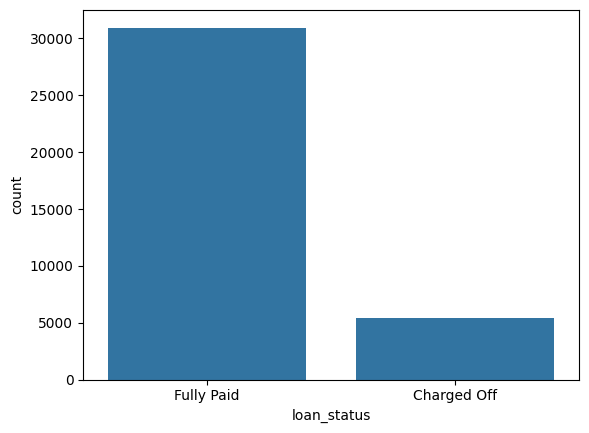

In [666]:
## Vizualize data by category only

sea.countplot(x = 'loan_status', data=loan_data)

In [894]:
## Remove alphabets and apply only numerics
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()

0    2
1    4
2    5
3    1
4    5
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

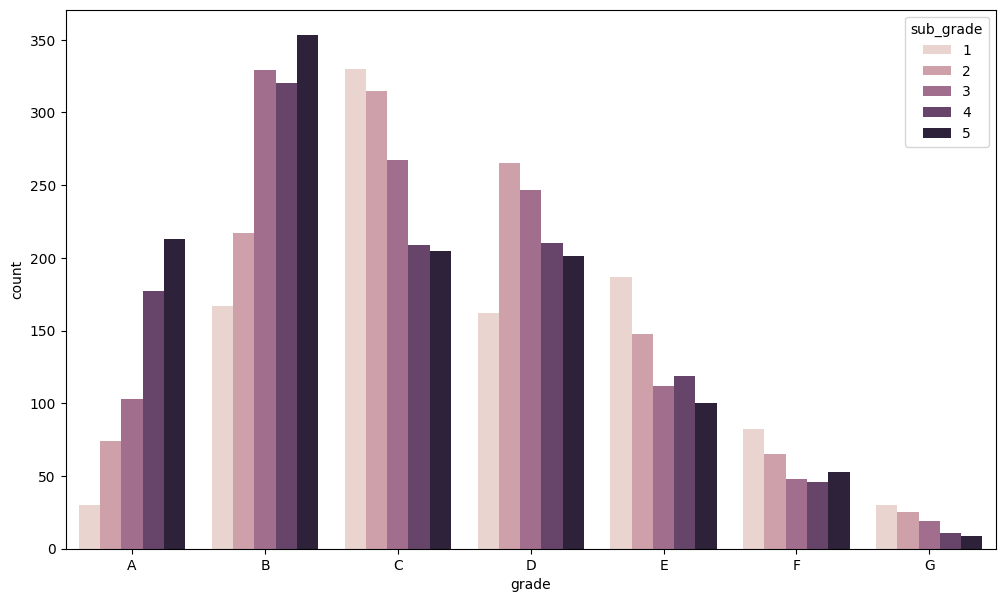

In [895]:
fig, ax = plt.subplots(figsize=(12,7))
sea.set_palette('colorblind')
sea.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'],order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue = 'sub_grade' )

<Axes: xlabel='grade', ylabel='count'>

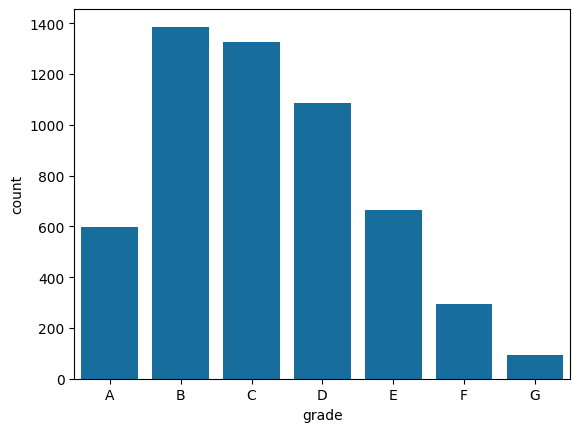

In [896]:
sea.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [897]:
loan_data.head()

loan_amnt  funded_amnt_inv        term  int_rate  installment grade  \
0       5000           4975.0   36 months     10.65       162.87     B   
1       2500           2500.0   60 months     15.27        59.83     C   
2       2400           2400.0   36 months     15.96        84.33     C   
3      10000          10000.0   36 months     13.49       339.31     C   
4       3000           3000.0   60 months     12.69        67.79     B   

   sub_grade  emp_length home_ownership  annual_inc verification_status  \
0          2          10           RENT     24000.0            Verified   
1          4           0           RENT     30000.0     Source Verified   
2          5          10           RENT     12252.0        Not Verified   
3          1          10           RENT     49200.0     Source Verified   
4          5           1           RENT     80000.0     Source Verified   

  issue_d  loan_status         purpose    dti earliest_cr_line  \
0  Dec-11   Fully Paid     credit_card  27.65           Jan-85   
1  Dec-11  Charged Off             car   1.00           Apr-99   
2  Dec-11   Fully Paid  small_business   8.72           Nov-01   
3  Dec-11   Fully Paid           other  20.00           Feb-96   
4  Dec-11          NaN           other  17.94           Jan-96   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               0        15        0        53.9         38   

  initial_list_status  
0                   f  
1                   f  
2                   f  
3                   f  
4                   f

In [898]:
#checking unique values for home_ownership
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [899]:
loan_data.home_ownership.value_counts()


home_ownership
RENT        18512
MORTGAGE    16556
OWN          2955
OTHER          91
NONE            3
Name: count, dtype: int64

In [900]:
#can replace NONE with OTHER
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)


/var/folders/c4/0697vh8d0dd6f0sw_k6b0f6shh0s4z/T/ipykernel_61319/2332066322.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [901]:
#checking unique values for home_ownership again
loan_data['home_ownership'].unique()


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

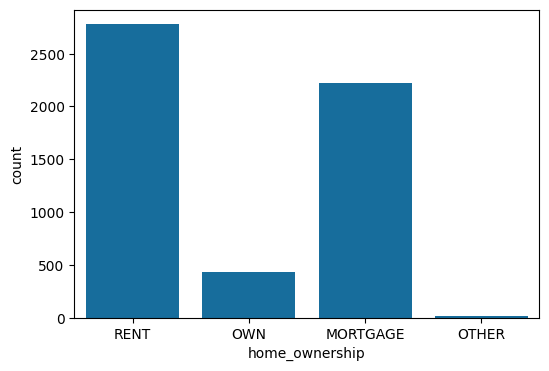

In [902]:
#Analysing Home Ownership
fig, ax = plt.subplots(figsize = (6,4))
sea.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])


#Applicants staying on Rent have not paid the instalments in due time for a long period of time, 
#i.e. he/she has defaulted on the loan 

<Axes: xlabel='count', ylabel='purpose'>

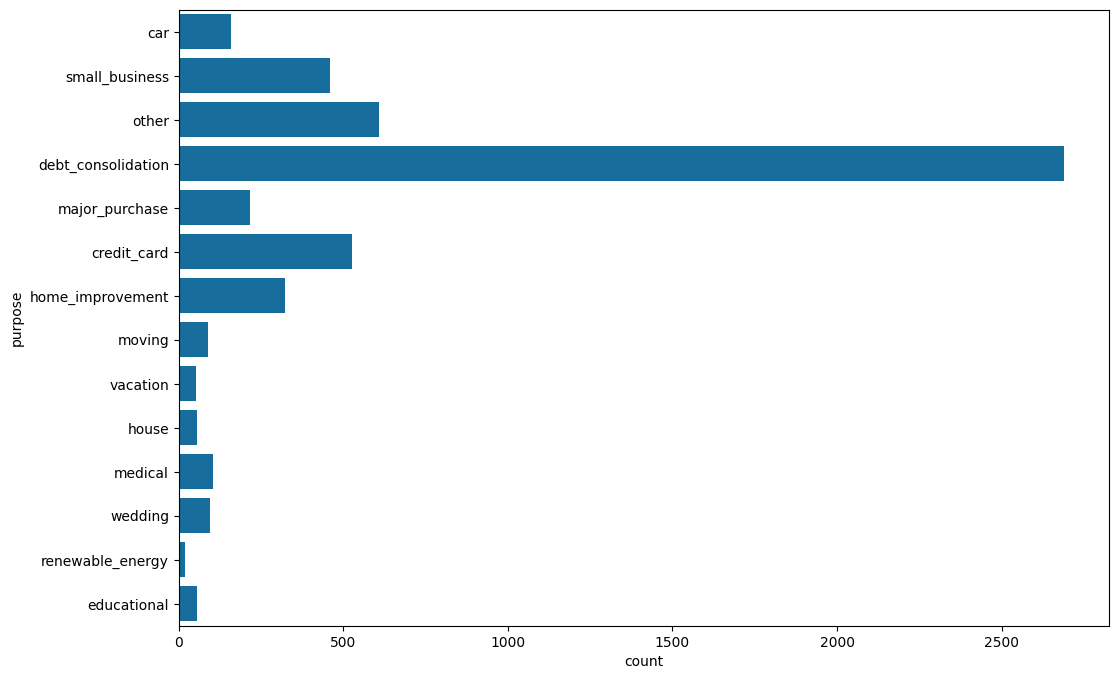

In [1023]:
# Analysing Purpose why does one need the loan
fig, ax = plt.subplots(figsize = (12,8))
#ax.set(xscale = 'log')
sea.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])

## Analysis purpose is a category provided by the borrower for the loan request. Appears that who ever took the 
## loan for debt_consolidation did not pay back and has defalted 



In [1024]:
loan_data.int_rate.describe()

count    38117.000000
mean        11.974101
std          3.702403
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [1029]:
loan_data.drop('int_rate_groups',axis=1)


loan_amnt  funded_amnt_inv        term  int_rate  installment grade  \
0           5000           4975.0   36 months     10.65       162.87     B   
1           2500           2500.0   60 months     15.27        59.83     C   
2           2400           2400.0   36 months     15.96        84.33     C   
3          10000          10000.0   36 months     13.49       339.31     C   
4           3000           3000.0   60 months     12.69        67.79     B   
...          ...              ...         ...       ...          ...   ...   
39711       5000            700.0   36 months      8.70       158.30     B   
39712       2500           1075.0   36 months      8.07        78.42     A   
39713       8500            875.0   36 months     10.28       275.38     C   
39714       5000           1325.0   36 months      8.07       156.84     A   
39716       7500            800.0   36 months     13.75       255.43     E   

       sub_grade  emp_length home_ownership  annual_inc verification_status  \
0              2          10           RENT     24000.0            Verified   
1              4           0           RENT     30000.0     Source Verified   
2              5          10           RENT     12252.0        Not Verified   
3              1          10           RENT     49200.0     Source Verified   
4              5           1           RENT     80000.0     Source Verified   
...          ...         ...            ...         ...                 ...   
39711          1           5       MORTGAGE     75000.0        Not Verified   
39712          4           4       MORTGAGE    110000.0        Not Verified   
39713          1           3           RENT     18000.0        Not Verified   
39714          4           0       MORTGAGE    100000.0        Not Verified   
39716          2           0            OWN     22000.0        Not Verified   

      issue_d  loan_status             purpose    dti earliest_cr_line  \
0      Dec-11   Fully Paid         credit_card  27.65           Jan-85   
1      Dec-11  Charged Off                 car   1.00           Apr-99   
2      Dec-11   Fully Paid      small_business   8.72           Nov-01   
3      Dec-11   Fully Paid               other  20.00           Feb-96   
4      Dec-11          NaN               other  17.94           Jan-96   
...       ...          ...                 ...    ...              ...   
39711  Jul-07   Fully Paid         credit_card  15.55           May-94   
39712  Jul-07   Fully Paid    home_improvement  11.33           Nov-90   
39713  Jul-07   Fully Paid         credit_card   6.40           Dec-86   
39714  Jul-07   Fully Paid  debt_consolidation   2.30           Oct-98   
39716  Jun-07   Fully Paid  debt_consolidation  14.29           Oct-03   

       inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0                   1         3        0        83.7          9   
1                   5         3        0         9.4          4   
2                   2         2        0        98.5         10   
3                   1        10        0        21.0         37   
4                   0        15        0        53.9         38   
...               ...       ...      ...         ...        ...   
39711               0        10        0        23.0         29   
39712               0        13        0        13.1         40   
39713               1         6        0        26.9          9   
39714               0        11        0        19.4         20   
39716               0         7        0        51.5          8   

      initial_list_status open_acc_groups revol_util_groups total_acc_groups  \
0                       f             2-6         72.2-99.9             2-13   
1                       f             2-6            0-25.4             2-13   
2                       f             2-6         72.2-99.9             2-13   
3                       f             2-6            0-25.4            13-20   
4                       f  

In [1034]:
#Create a group of the interest rates we have divided them into 8 bins the above calc was to check min, max and median
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=7,precision =0,labels=['5%-8%','8%-10%','10%-12%','12%-14%','14%-16%','16%-20%','20%-24%'])


<Axes: xlabel='count', ylabel='int_rate_groups'>

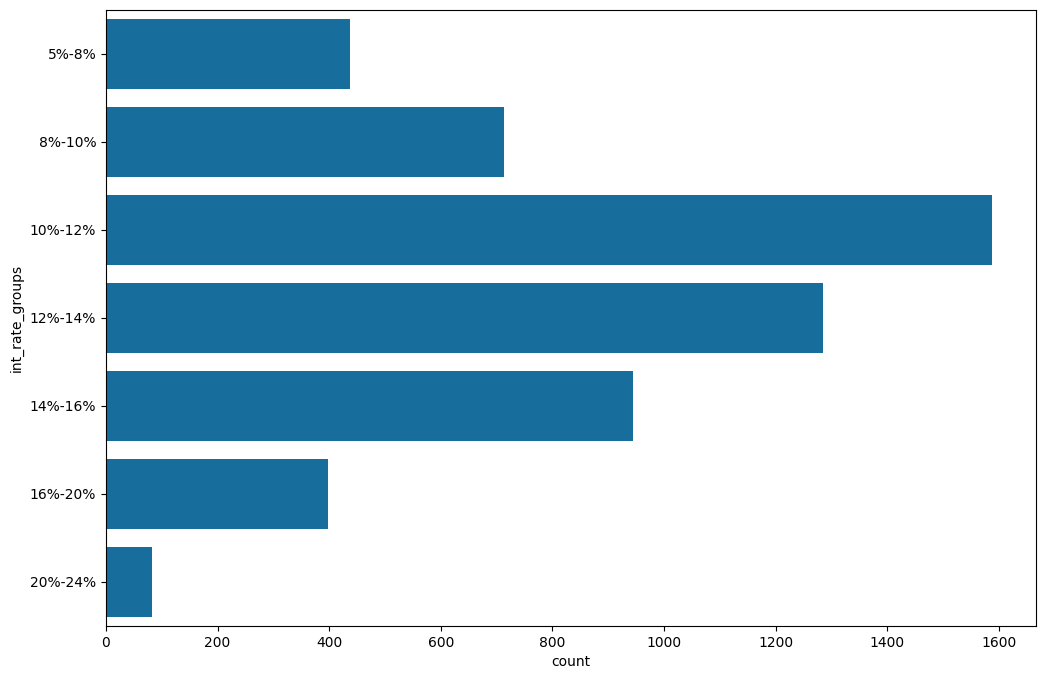

In [1035]:
# Analysing int_rate on loan
fig, ax = plt.subplots(figsize = (12,8))
#ax.set(xscale = 'log')
sea.countplot(y ='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

## Analysis int_rate Interest Rate on the loan. Appears that maximum number 
## who took the loan at interest rates 8.94% and 11.83% defaulted


In [965]:
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 4,precision =0,labels=['2-6','6-9','9-12','12-44'])

<Axes: xlabel='count', ylabel='open_acc_groups'>

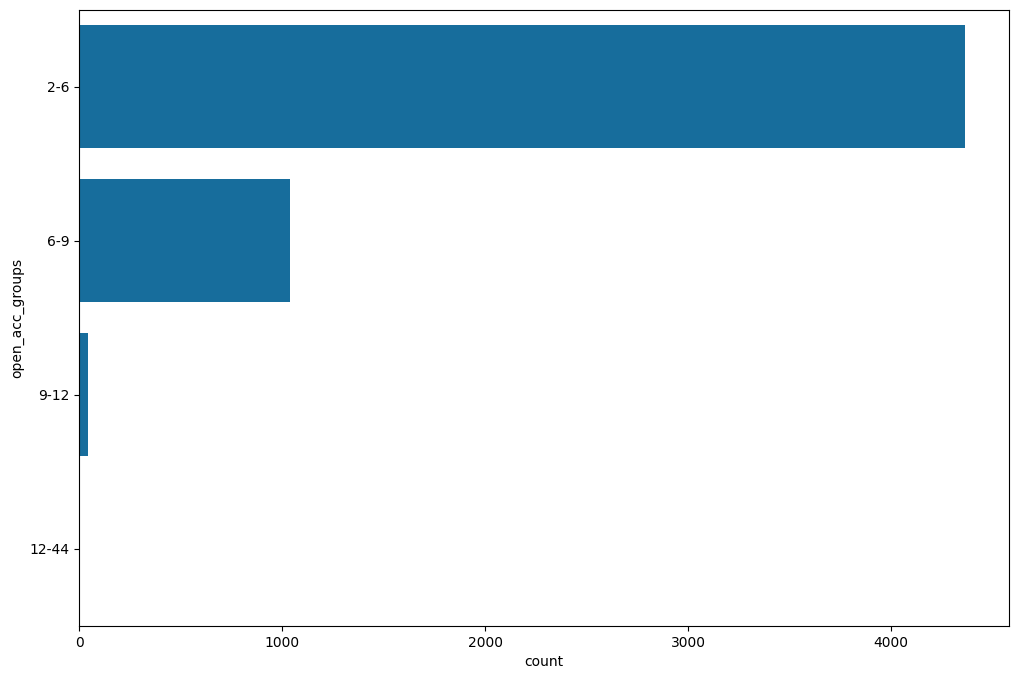

In [966]:
# Analysis to get the Group by open_acc -> The number of open credit lines in the borrower's credit file.

fig, ax = plt.subplots(figsize = (12,8))
sea.countplot(y ='open_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

## Analysis open_acc . Maximum number are part of the 2-6% credit line group

In [967]:
loan_data.loc[:,['open_acc', 'open_acc_groups']]

open_acc open_acc_groups
0             3             2-6
1             3             2-6
2             2             2-6
3            10             2-6
4            15             6-9
...         ...             ...
39711        10             2-6
39712        13             6-9
39713         6             2-6
39714        11             2-6
39716         7             2-6

[38117 rows x 2 columns]

In [973]:
loan_data.revol_util.describe()

count    38117.000000
mean        48.778135
std         28.269007
min          0.000000
25%         25.400000
50%         49.200000
75%         72.200000
max         99.900000
Name: revol_util, dtype: float64

In [936]:
#revol_util_groups
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=4,precision =0,labels=['0-25.4','25.4-49.2','49.2-72.2','72.2-99.9'])


<Axes: xlabel='count', ylabel='revol_util_groups'>

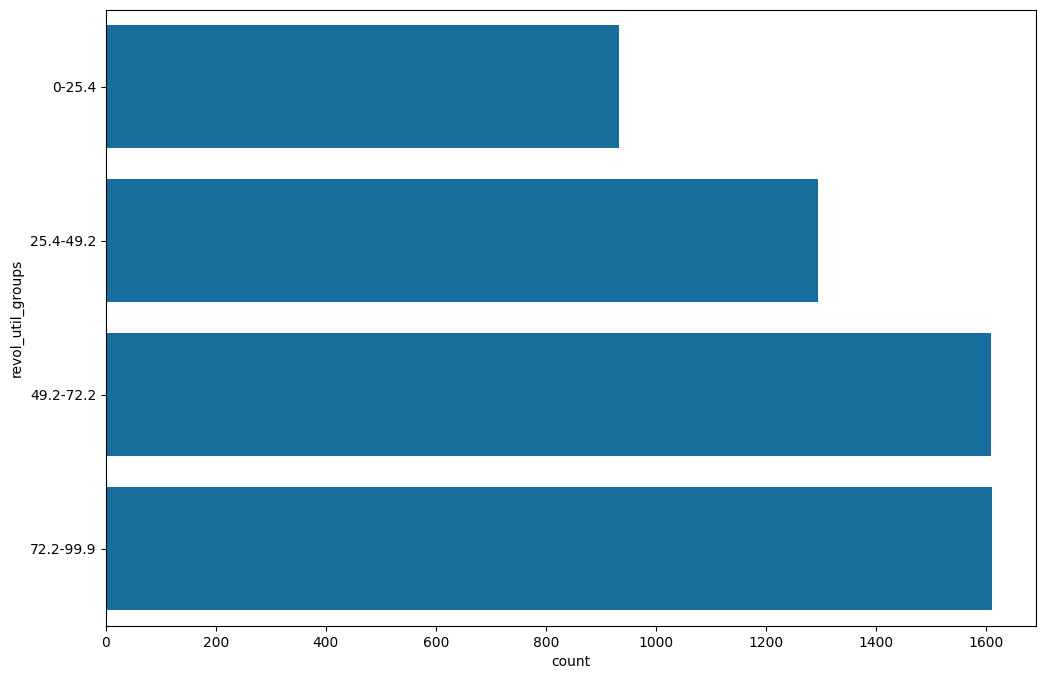

In [972]:
# Analysis to get the Group by revol_util_groups -> 
## Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

fig, ax = plt.subplots(figsize = (12,8))
sea.countplot(y ='revol_util_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

In [974]:
loan_data.revol_util_groups.describe()

count         38117
unique            4
top       49.2-72.2
freq          10247
Name: revol_util_groups, dtype: object

In [ ]:
# Maximum grouping that have defaulted are in range 49.2 & 72.2

In [975]:
#total_acc -> The total number of credit lines currently in the borrower's credit file
loan_data['total_acc'].describe()

count    38117.000000
mean        21.764567
std         11.235045
min          2.000000
25%         13.000000
50%         20.000000
75%         28.000000
max         90.000000
Name: total_acc, dtype: float64

In [940]:
#Create the total acc group column
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=4,precision =0,labels=['2-13','13-20','20-28','28-90'])


In [976]:
loan_data['total_acc_groups'].describe()

count     38117
unique        4
top        2-13
freq      24628
Name: total_acc_groups, dtype: object

<Axes: xlabel='count', ylabel='total_acc_groups'>

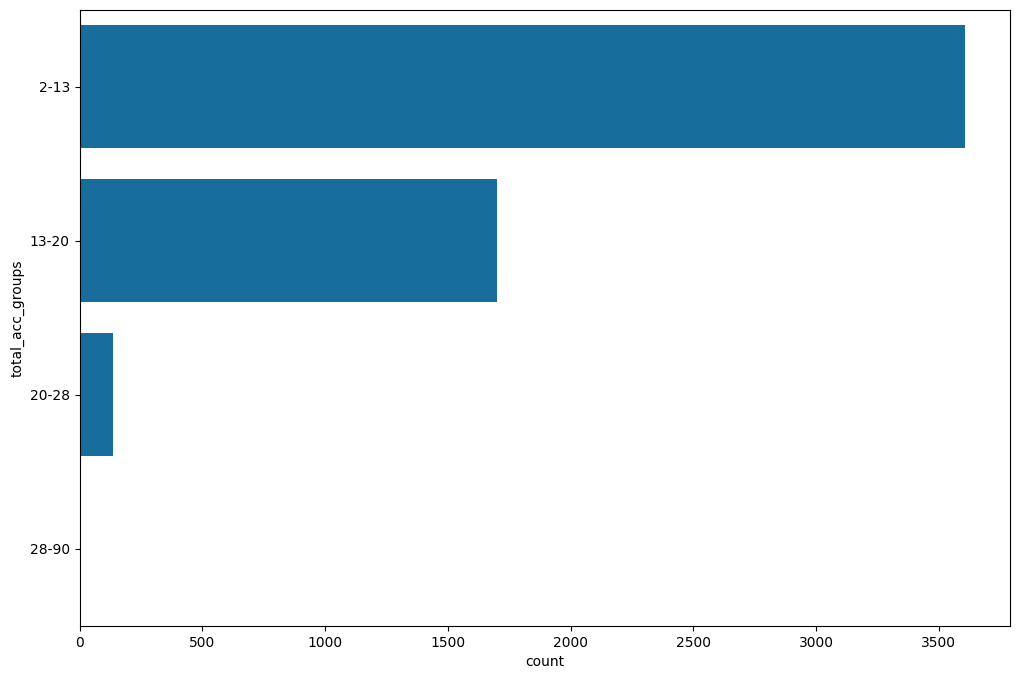

In [977]:
# Analysis to get the Group by total_acc_groups -> 
## The total number of credit lines currently in the borrower's credit file

fig, ax = plt.subplots(figsize = (12,8))
sea.countplot(y ='total_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

In [ ]:
# Analysis : Maximum number of defaulters are those that have a credit line between 2 and 13

In [979]:
#The self-reported annual income provided by the borrower during registration.
loan_data['annual_inc'].describe()

count     38117.000000
mean      62067.543274
std       29123.448836
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       79200.000000
max      150000.000000
Name: annual_inc, dtype: float64

In [981]:
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=4,precision =0,labels =['4k-40k','40k-57k','57k-79200','79200-150k'])


<Axes: xlabel='count', ylabel='annual_inc_groups'>

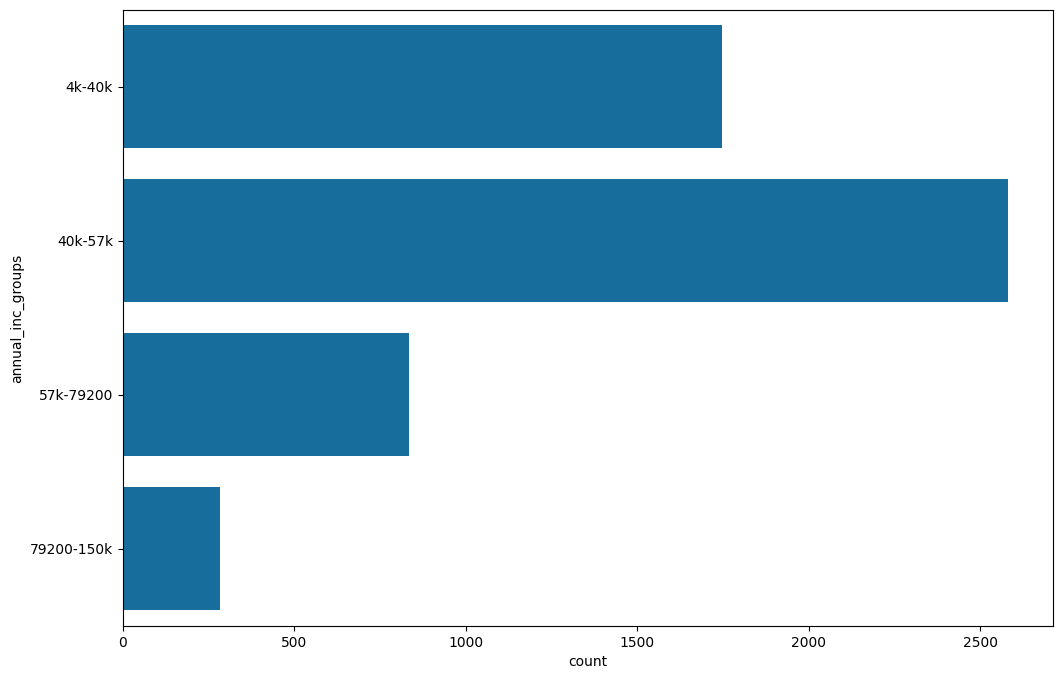

In [982]:
# Analysis to get the Group by Annual Income -> 
## The total income reported by the user

fig, ax = plt.subplots(figsize = (12,8))
sea.countplot(y ='annual_inc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

In [715]:
# The people who have declared annual salaries in group 40K to 57K are high defaulters

In [947]:
#View Bins

loan_data.head()

loan_amnt  funded_amnt_inv        term  int_rate  installment grade  \
0       5000           4975.0   36 months     10.65       162.87     B   
1       2500           2500.0   60 months     15.27        59.83     C   
2       2400           2400.0   36 months     15.96        84.33     C   
3      10000          10000.0   36 months     13.49       339.31     C   
4       3000           3000.0   60 months     12.69        67.79     B   

   sub_grade  emp_length home_ownership  annual_inc verification_status  \
0          2          10           RENT     24000.0            Verified   
1          4           0           RENT     30000.0     Source Verified   
2          5          10           RENT     12252.0        Not Verified   
3          1          10           RENT     49200.0     Source Verified   
4          5           1           RENT     80000.0     Source Verified   

  issue_d  loan_status         purpose    dti earliest_cr_line  \
0  Dec-11   Fully Paid     credit_card  27.65           Jan-85   
1  Dec-11  Charged Off             car   1.00           Apr-99   
2  Dec-11   Fully Paid  small_business   8.72           Nov-01   
3  Dec-11   Fully Paid           other  20.00           Feb-96   
4  Dec-11          NaN           other  17.94           Jan-96   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               0        15        0        53.9         38   

  initial_list_status int_rate_groups open_acc_groups revol_util_groups  \
0                   f     8.9%-11.83%             2-6         72.2-99.9   
1                   f   11.83%-14.46%             2-6            0-25.4   
2                   f   11.83%-14.46%             2-6         72.2-99.9   
3                   f     8.9%-11.83%             2-6            0-25.4   
4                   f     8.9%-11.83%             6-9         49.2-72.2   

  total_acc_groups annual_inc_groups  
0             2-13            4k-40k  
1             2-13            4k-40k  
2             2-13            4k-40k  
3            13-20           40k-57k  
4            13-20         57k-79200

<Axes: xlabel='emp_length', ylabel='count'>

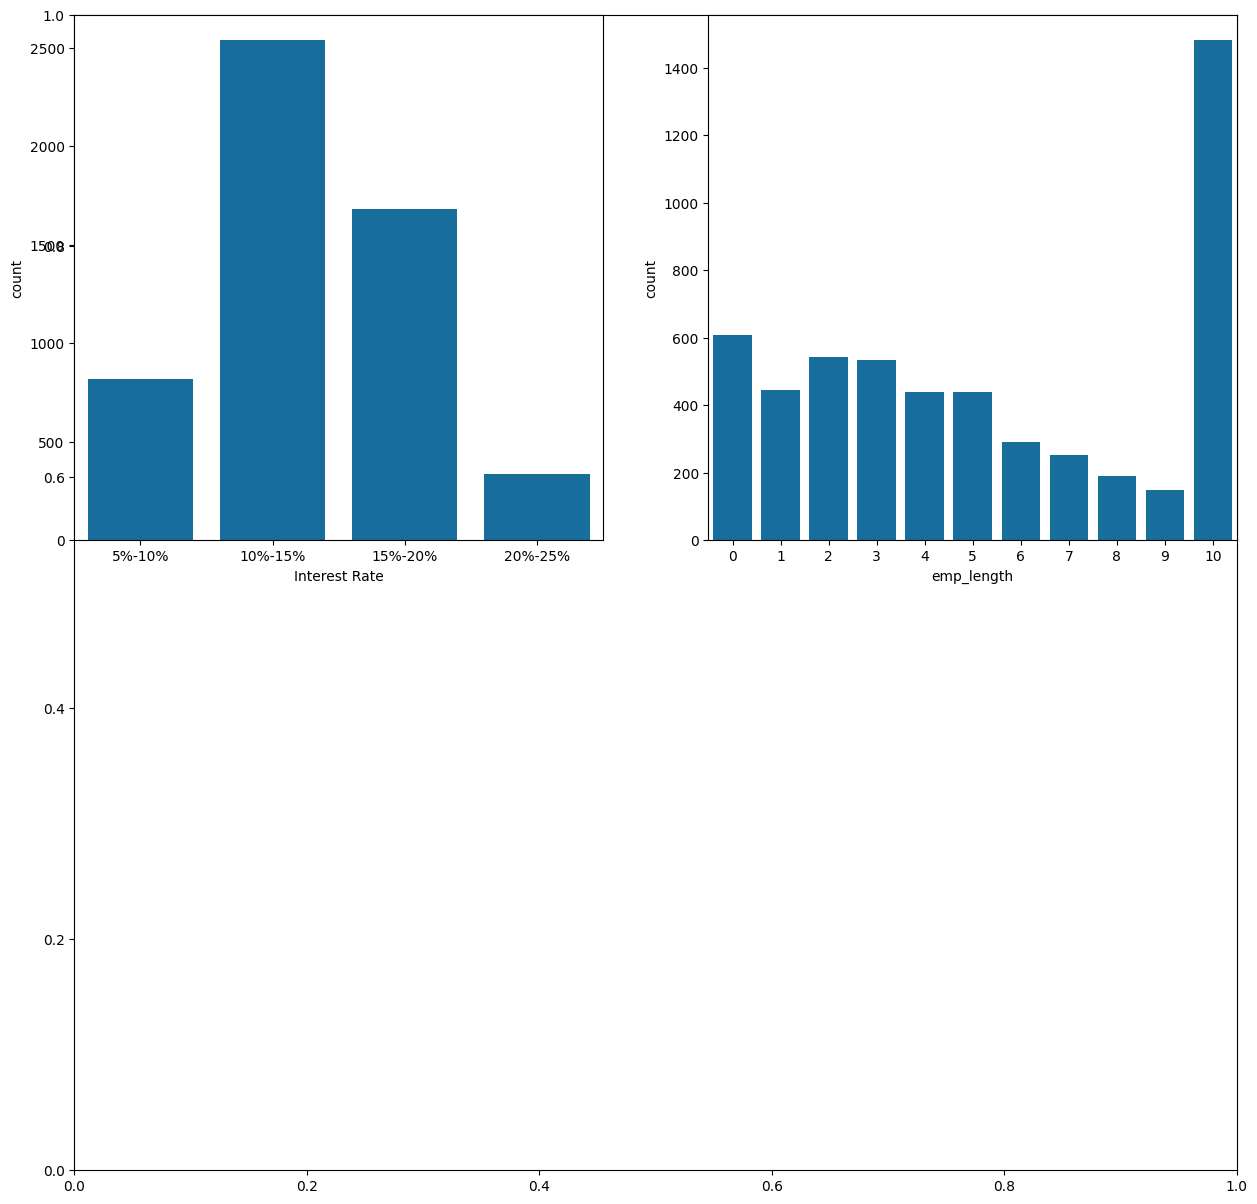

In [730]:
fig, ax = plt.subplots(figsize = (15,15))
plt.subplot(221)
sea.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sea.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])


<Axes: xlabel='annual_inc_groups', ylabel='count'>

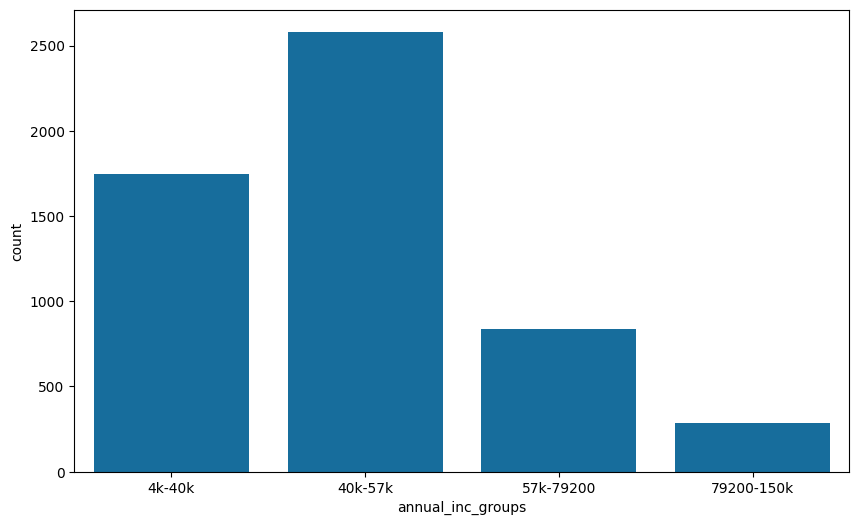

In [984]:
fig, ax = plt.subplots(figsize = (10,6))
sea.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='term'>

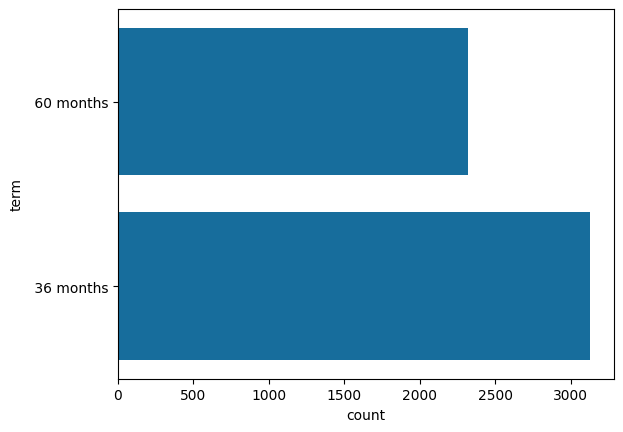

In [985]:
sea.countplot(y='term', data=loan_data[loan_data['loan_status']=='Charged Off'])

#The people who take loans for 36months are likely to falter

<Axes: xlabel='verification_status', ylabel='count'>

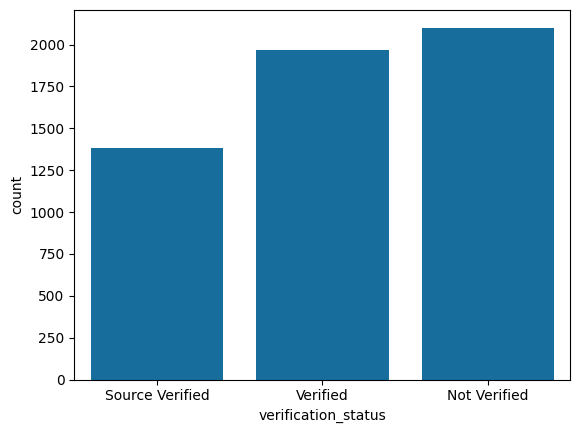

In [986]:
sea.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])

#Those who are not verified tend to default more 

<Axes: xlabel='inq_last_6mths', ylabel='count'>

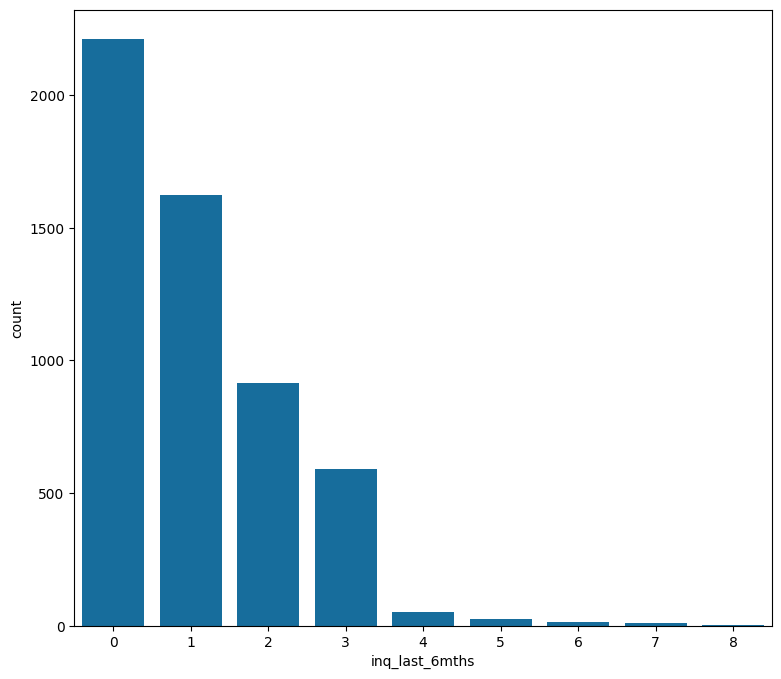

In [987]:
fig,ax = plt.subplots(figsize = (9,8))
#ax.set_yscale('log')
sea.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [ ]:
#those who have enquired in last 6 months are likely to default more

<Axes: xlabel='pub_rec', ylabel='count'>

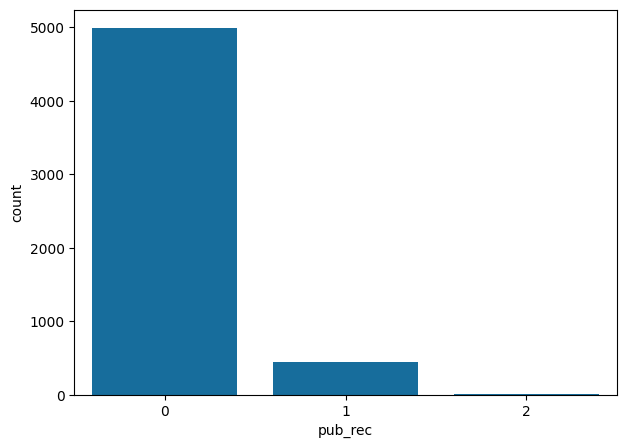

In [988]:
fig,ax = plt.subplots(figsize = (7,5))
sea.countplot(x='pub_rec', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [989]:
# Number of derogatory public records is zero the defaults are high

In [990]:
loan_data.head()

loan_amnt  funded_amnt_inv        term  int_rate  installment grade  \
0       5000           4975.0   36 months     10.65       162.87     B   
1       2500           2500.0   60 months     15.27        59.83     C   
2       2400           2400.0   36 months     15.96        84.33     C   
3      10000          10000.0   36 months     13.49       339.31     C   
4       3000           3000.0   60 months     12.69        67.79     B   

   sub_grade  emp_length home_ownership  annual_inc verification_status  \
0          2          10           RENT     24000.0            Verified   
1          4           0           RENT     30000.0     Source Verified   
2          5          10           RENT     12252.0        Not Verified   
3          1          10           RENT     49200.0     Source Verified   
4          5           1           RENT     80000.0     Source Verified   

  issue_d  loan_status         purpose    dti earliest_cr_line  \
0  Dec-11   Fully Paid     credit_card  27.65           Jan-85   
1  Dec-11  Charged Off             car   1.00           Apr-99   
2  Dec-11   Fully Paid  small_business   8.72           Nov-01   
3  Dec-11   Fully Paid           other  20.00           Feb-96   
4  Dec-11          NaN           other  17.94           Jan-96   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               0        15        0        53.9         38   

  initial_list_status int_rate_groups open_acc_groups revol_util_groups  \
0                   f    8.94%-11.83%             2-6         72.2-99.9   
1                   f   11.83%-14.46%             2-6            0-25.4   
2                   f   11.83%-14.46%             2-6         72.2-99.9   
3                   f    8.94%-11.83%             2-6            0-25.4   
4                   f    8.94%-11.83%             6-9         49.2-72.2   

  total_acc_groups annual_inc_groups  
0             2-13            4k-40k  
1             2-13            4k-40k  
2             2-13            4k-40k  
3            13-20           40k-57k  
4            13-20         57k-79200

In [991]:
## Extracting month and year
df_month_year = loan_data['issue_d'].str.partition("-", True)     
loan_data['loan_issue_month']=df_month_year[0]                       
loan_data['loan_issue_year']='20' + df_month_year[2]

In [992]:
loan_data.head()

loan_amnt  funded_amnt_inv        term  int_rate  installment grade  \
0       5000           4975.0   36 months     10.65       162.87     B   
1       2500           2500.0   60 months     15.27        59.83     C   
2       2400           2400.0   36 months     15.96        84.33     C   
3      10000          10000.0   36 months     13.49       339.31     C   
4       3000           3000.0   60 months     12.69        67.79     B   

   sub_grade  emp_length home_ownership  annual_inc verification_status  \
0          2          10           RENT     24000.0            Verified   
1          4           0           RENT     30000.0     Source Verified   
2          5          10           RENT     12252.0        Not Verified   
3          1          10           RENT     49200.0     Source Verified   
4          5           1           RENT     80000.0     Source Verified   

  issue_d  loan_status         purpose    dti earliest_cr_line  \
0  Dec-11   Fully Paid     credit_card  27.65           Jan-85   
1  Dec-11  Charged Off             car   1.00           Apr-99   
2  Dec-11   Fully Paid  small_business   8.72           Nov-01   
3  Dec-11   Fully Paid           other  20.00           Feb-96   
4  Dec-11          NaN           other  17.94           Jan-96   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               0        15        0        53.9         38   

  initial_list_status int_rate_groups open_acc_groups revol_util_groups  \
0                   f    8.94%-11.83%             2-6         72.2-99.9   
1                   f   11.83%-14.46%             2-6            0-25.4   
2                   f   11.83%-14.46%             2-6         72.2-99.9   
3                   f    8.94%-11.83%             2-6            0-25.4   
4                   f    8.94%-11.83%             6-9         49.2-72.2   

  total_acc_groups annual_inc_groups loan_issue_month loan_issue_year  
0             2-13            4k-40k              Dec            2011  
1             2-13            4k-40k              Dec            2011  
2             2-13            4k-40k              Dec            2011  
3            13-20           40k-57k              Dec            2011  
4            13-20         57k-79200              Dec            2011

<Axes: xlabel='loan_issue_year', ylabel='count'>

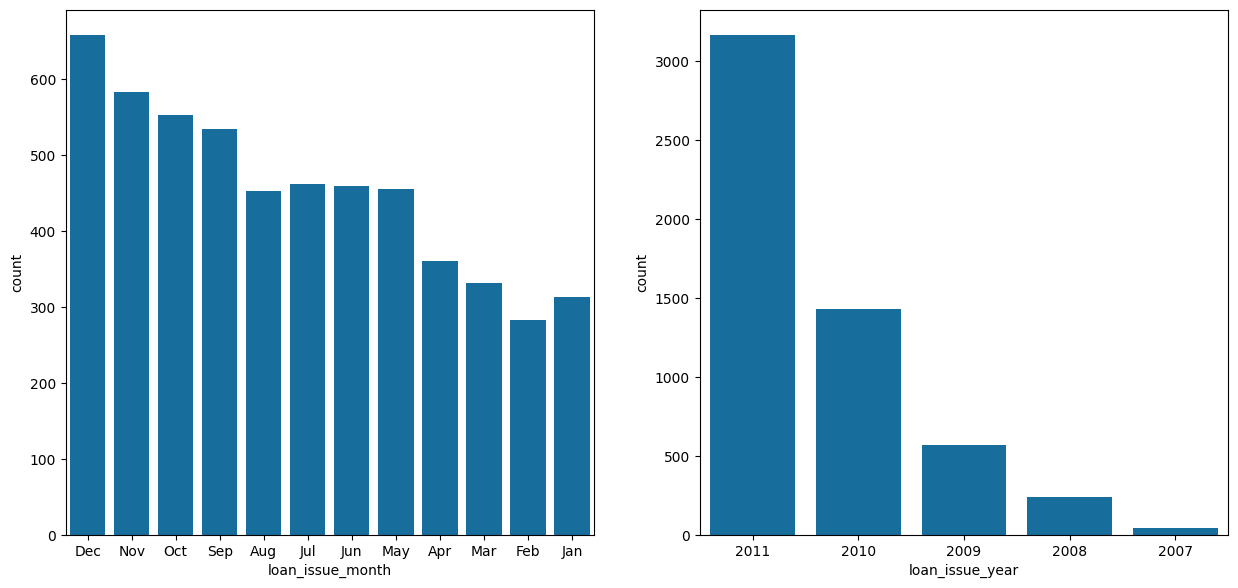

In [995]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sea.countplot(x='loan_issue_month', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sea.countplot(x='loan_issue_year', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [996]:
#Maximum number of loan default happened in the year 2011 and the month was december

In [997]:
loan_data.installment.describe()

count    38117.000000
mean       316.144847
std        201.234625
min         15.690000
25%        164.850000
50%        274.970000
75%        415.460000
max       1305.190000
Name: installment, dtype: float64

In [1000]:
## Analyzing installment group
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=4,precision =0,labels =['15.69k-164k','164.85k-274.97k','274.97k-415k','415.46K-1305k'])


<Axes: xlabel='installment_groups', ylabel='count'>

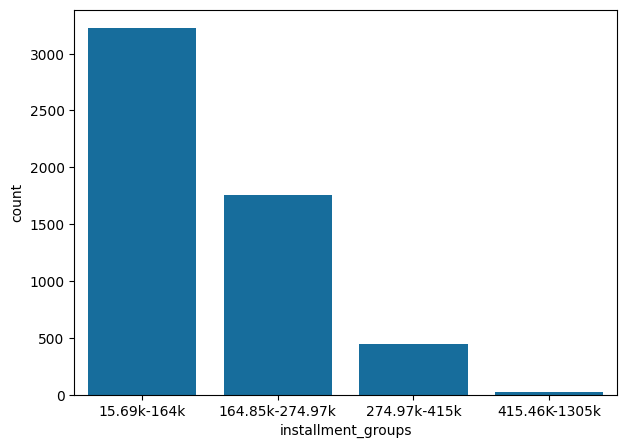

In [1001]:
fig,ax = plt.subplots(figsize = (7,5))
sea.countplot(x='installment_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [ ]:
#The applicants who have lower installments tend to falter more

In [1002]:
## funded_amnt_inv -> The total amount committed by investors for that loan at that point in time.
loan_data.funded_amnt_inv.describe()

count    38117.000000
mean     10132.747247
std       6893.421334
min          0.000000
25%       5000.000000
50%       8619.703424
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [1003]:
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=4,labels=['0-5k','5k-8619','8619-14k','14k-35k'])


<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

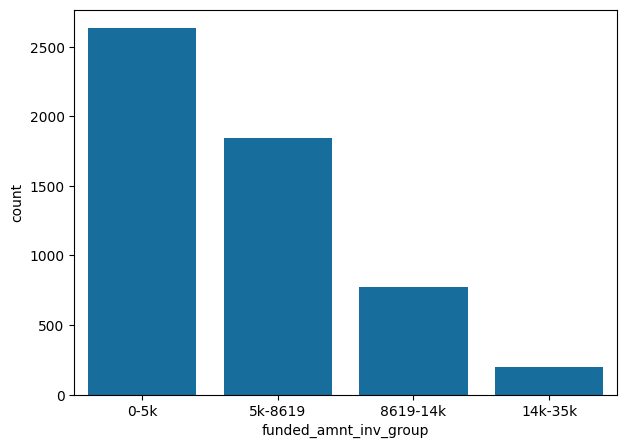

In [1004]:
fig,ax = plt.subplots(figsize = (7,5))
sea.countplot(x='funded_amnt_inv_group', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [1005]:
# The lower the committment by the investors the higher the default rate

In [ ]:
## loan_amount: The listed amount of the loan applied for by the borrower. 
## If at some point in time, the credit department reduces the loan amount, 
## then it will be reflected in this value.

In [1006]:
loan_data.loan_amnt.describe()

count    38117.000000
mean     10927.886507
std       7216.163201
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [1007]:
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=4,precision =0,labels=['500-5200','5200-9600','9600-15k','15k-35k'])


<Axes: xlabel='loan_amnt_groups', ylabel='count'>

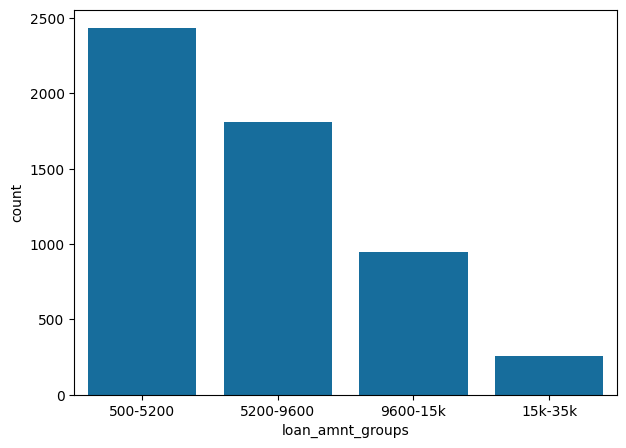

In [1008]:
fig,ax = plt.subplots(figsize = (7,5))
sea.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [ ]:
# The lower the amount the higher number of the applicants default

In [ ]:
## DTI - > A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, 
## excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [1009]:
loan_data.dti.describe()

count    38117.000000
mean        13.462446
std          6.666754
min          0.000000
25%          8.360000
50%         13.590000
75%         18.730000
max         29.990000
Name: dti, dtype: float64

In [1018]:
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=7,precision =0,labels=['0-8.36','8.36-10','10-12','12-14','14-16','16-18','18-29.99'])


<Axes: xlabel='dti_groups', ylabel='count'>

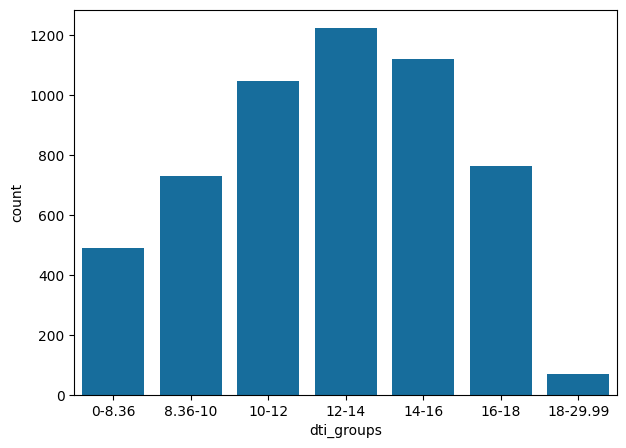

In [1019]:
fig,ax = plt.subplots(figsize = (7,5))
sea.countplot(x='dti_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [1020]:
loan_data.dti_groups.describe()

count     38117
unique        7
top       12-14
freq       8215
Name: dti_groups, dtype: object

In [ ]:
# Applicants between 12-14 DTI have faltered more

In [1036]:
##Observations

#There is a more probability of defaulting when :
#Applicants house_ownership as 'RENT'
#Applicants who use the loan to clear other debts
#Applicants who receive interest at the rate of 10-16%
#Applicants who have an income of range 31201 - 58402
#Applicants who have 2-6 open_acc
#Applicants who have revolving line between 49 and 99
#Applicants with employment length of 10
#Term of 36 months
#When the loan status is Not verified
#The total number of credit lines currently in the borrower's credit file is between 2-13
#The people who have declared annual salaries in group 40K to 57K 
#When the no of enquiries in last 6 months is 0
#When the number of derogatory public records is 0
#When the purpose is 'debt_consolidation'
#DTI is 10-16
#Loan amount is 500 to 5200
#funded amount is around the 5K range
# Observation on dates in the year 2011 particularly in December month there are high defaults

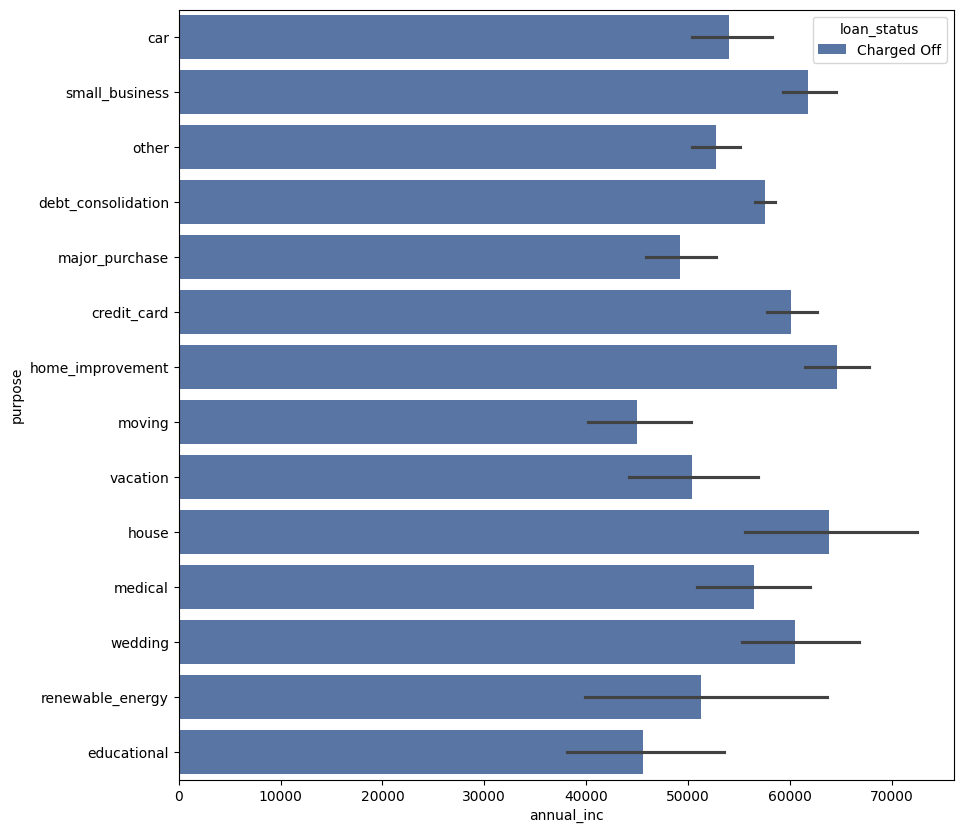

In [1039]:
#Income to purpose on defaulting

plt.figure(figsize=(10,10))
sea.barplot(data =loan_data[loan_data['loan_status']=='Charged Off'],x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

# People with high salaries mostly defaulted home imporovement, house and small_business 
# People with low salaries mostly defaulted on education and moving

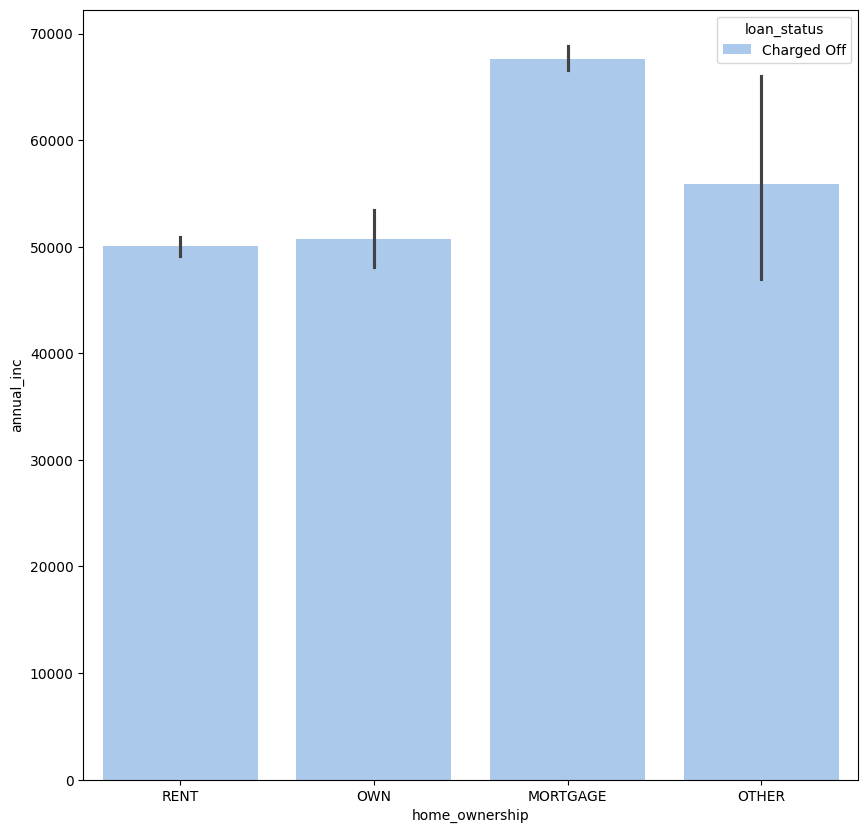

In [1042]:
#Income vs Ownership
plt.figure(figsize=(10,10))
sea.barplot(data =loan_data[loan_data['loan_status']=='Charged Off'],x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

In [1046]:
## The higersalaried applicants are on mortgage tend to default more 
## individuals with lower salaries living on Rent default 
loan_data.head()

loan_amnt  funded_amnt_inv        term  int_rate  installment grade  \
0       5000           4975.0   36 months     10.65       162.87     B   
1       2500           2500.0   60 months     15.27        59.83     C   
2       2400           2400.0   36 months     15.96        84.33     C   
3      10000          10000.0   36 months     13.49       339.31     C   
4       3000           3000.0   60 months     12.69        67.79     B   

   sub_grade  emp_length home_ownership  annual_inc verification_status  \
0          2          10           RENT     24000.0            Verified   
1          4           0           RENT     30000.0     Source Verified   
2          5          10           RENT     12252.0        Not Verified   
3          1          10           RENT     49200.0     Source Verified   
4          5           1           RENT     80000.0     Source Verified   

  issue_d  loan_status         purpose    dti earliest_cr_line  \
0  Dec-11   Fully Paid     credit_card  27.65           Jan-85   
1  Dec-11  Charged Off             car   1.00           Apr-99   
2  Dec-11   Fully Paid  small_business   8.72           Nov-01   
3  Dec-11   Fully Paid           other  20.00           Feb-96   
4  Dec-11          NaN           other  17.94           Jan-96   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               0        15        0        53.9         38   

  initial_list_status int_rate_groups open_acc_groups revol_util_groups  \
0                   f          8%-10%             2-6         72.2-99.9   
1                   f         12%-14%             2-6            0-25.4   
2                   f         12%-14%             2-6         72.2-99.9   
3                   f         10%-12%             2-6            0-25.4   
4                   f         10%-12%             6-9         49.2-72.2   

  total_acc_groups annual_inc_groups loan_issue_month loan_issue_year  \
0             2-13            4k-40k              Dec            2011   
1             2-13            4k-40k              Dec            2011   
2             2-13            4k-40k              Dec            2011   
3            13-20           40k-57k              Dec            2011   
4            13-20         57k-79200              Dec            2011   

  installment_groups funded_amnt_inv_group loan_amnt_groups dti_groups  
0        15.69k-164k                  0-5k         500-5200   18-29.99  
1        15.69k-164k                  0-5k         500-5200     0-8.36  
2        15.69k-164k                  0-5k         500-5200      10-12  
3    164.85k-274.97k               5k-8619        5200-9600      14-16  
4        15.69k-164k                  0-5k         500-5200      14-16

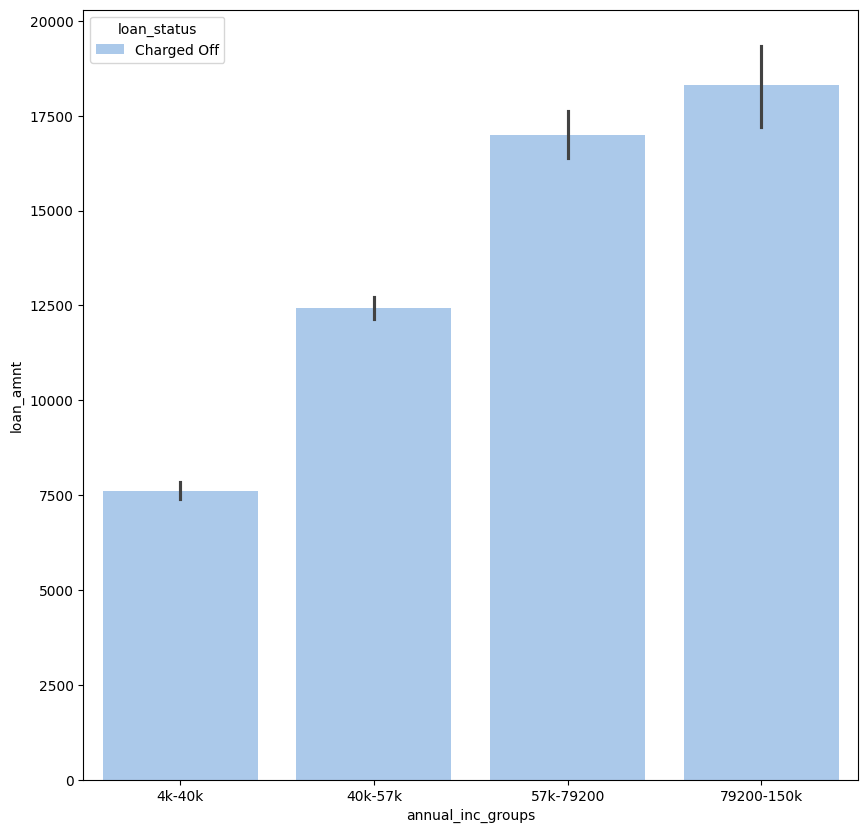

In [1049]:
#Income vs loan_amount
plt.figure(figsize=(10,10))
sea.barplot(data =loan_data[loan_data['loan_status']=='Charged Off'],x='annual_inc_groups', y='loan_amnt', hue ='loan_status',palette="pastel")
plt.show()

In [1050]:
## Across all groups loan amount is higher for those who defaulted

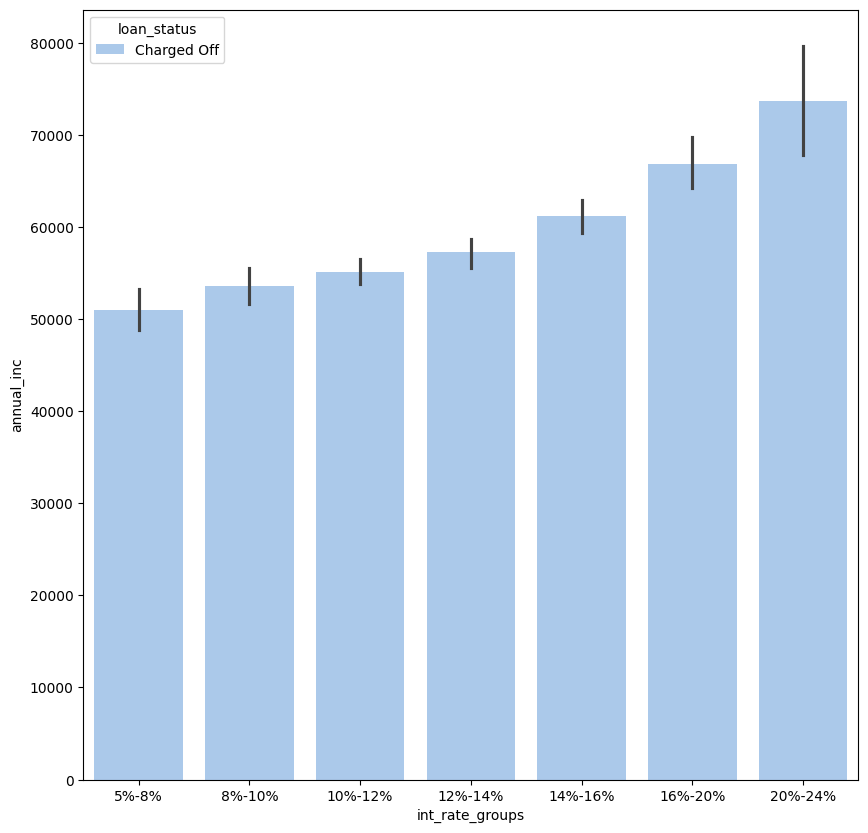

In [1060]:
#Income vs int_rate
plt.figure(figsize=(10,10))
sea.barplot(data =loan_data[loan_data['loan_status']=='Charged Off'],x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

In [1055]:
#People with higher income paid more interest and defaulted
loan_data.head()

loan_amnt  funded_amnt_inv        term  int_rate  installment grade  \
0       5000           4975.0   36 months     10.65       162.87     B   
1       2500           2500.0   60 months     15.27        59.83     C   
2       2400           2400.0   36 months     15.96        84.33     C   
3      10000          10000.0   36 months     13.49       339.31     C   
4       3000           3000.0   60 months     12.69        67.79     B   

   sub_grade  emp_length home_ownership  annual_inc verification_status  \
0          2          10           RENT     24000.0            Verified   
1          4           0           RENT     30000.0     Source Verified   
2          5          10           RENT     12252.0        Not Verified   
3          1          10           RENT     49200.0     Source Verified   
4          5           1           RENT     80000.0     Source Verified   

  issue_d  loan_status         purpose    dti earliest_cr_line  \
0  Dec-11   Fully Paid     credit_card  27.65           Jan-85   
1  Dec-11  Charged Off             car   1.00           Apr-99   
2  Dec-11   Fully Paid  small_business   8.72           Nov-01   
3  Dec-11   Fully Paid           other  20.00           Feb-96   
4  Dec-11          NaN           other  17.94           Jan-96   

   inq_last_6mths  open_acc  pub_rec  revol_util  total_acc  \
0               1         3        0        83.7          9   
1               5         3        0         9.4          4   
2               2         2        0        98.5         10   
3               1        10        0        21.0         37   
4               0        15        0        53.9         38   

  initial_list_status int_rate_groups open_acc_groups revol_util_groups  \
0                   f          8%-10%             2-6         72.2-99.9   
1                   f         12%-14%             2-6            0-25.4   
2                   f         12%-14%             2-6         72.2-99.9   
3                   f         10%-12%             2-6            0-25.4   
4                   f         10%-12%             6-9         49.2-72.2   

  total_acc_groups annual_inc_groups loan_issue_month loan_issue_year  \
0             2-13            4k-40k              Dec            2011   
1             2-13            4k-40k              Dec            2011   
2             2-13            4k-40k              Dec            2011   
3            13-20           40k-57k              Dec            2011   
4            13-20         57k-79200              Dec            2011   

  installment_groups funded_amnt_inv_group loan_amnt_groups dti_groups  
0        15.69k-164k                  0-5k         500-5200   18-29.99  
1        15.69k-164k                  0-5k         500-5200     0-8.36  
2        15.69k-164k                  0-5k         500-5200      10-12  
3    164.85k-274.97k               5k-8619        5200-9600      14-16  
4        15.69k-164k                  0-5k         500-5200      14-16

<Axes: xlabel='loan_issue_year', ylabel='loan_amnt'>

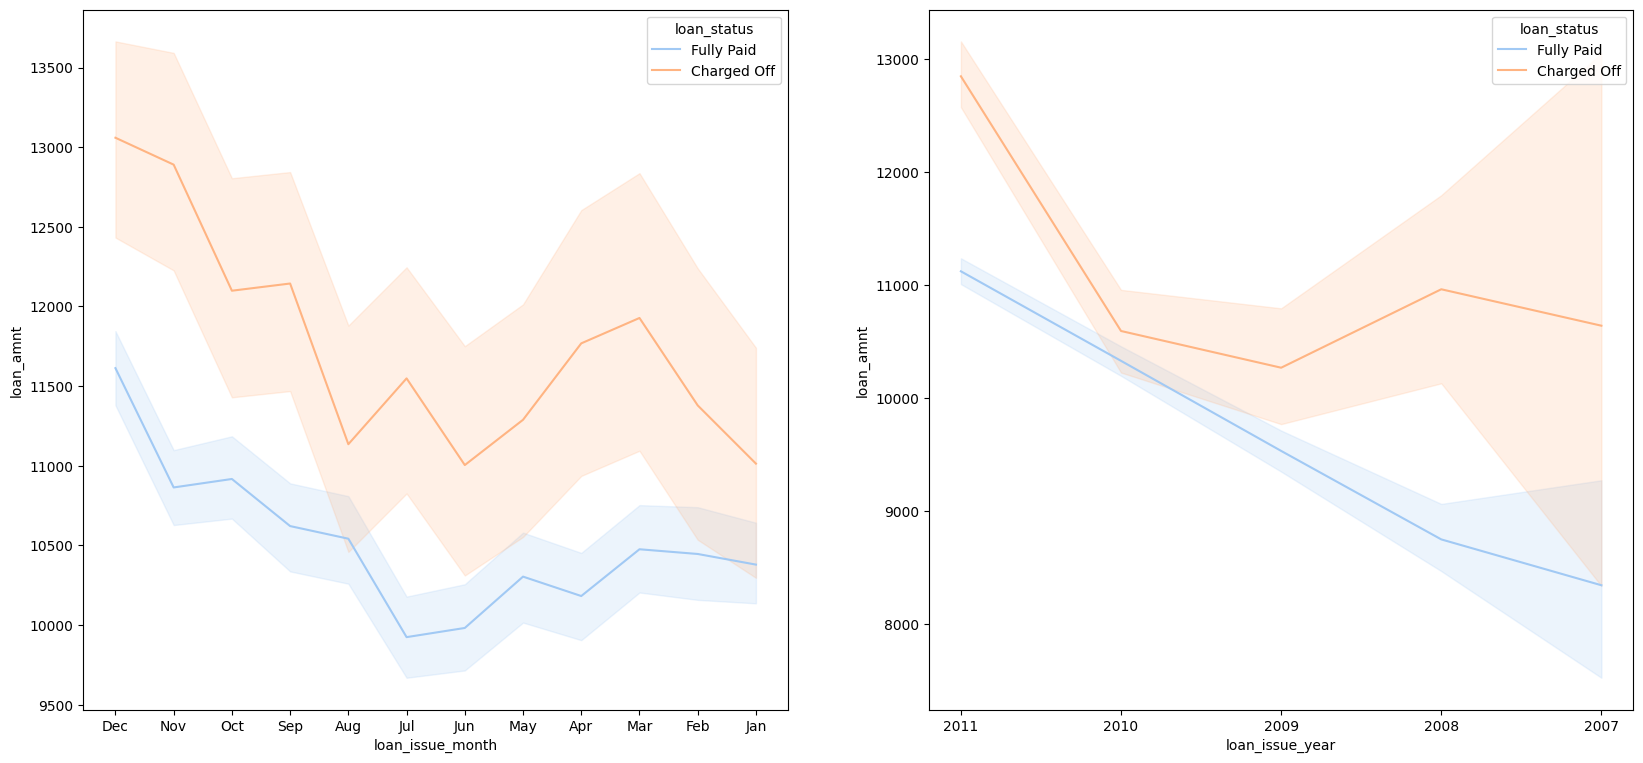

In [1056]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sea.lineplot(data =loan_data,y='loan_amnt', x='loan_issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sea.lineplot(data =loan_data,y='loan_amnt', x='loan_issue_year', hue ='loan_status',palette="pastel")

In [ ]:
#Year 2011 there were a lot of loans given and high rate of default also

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

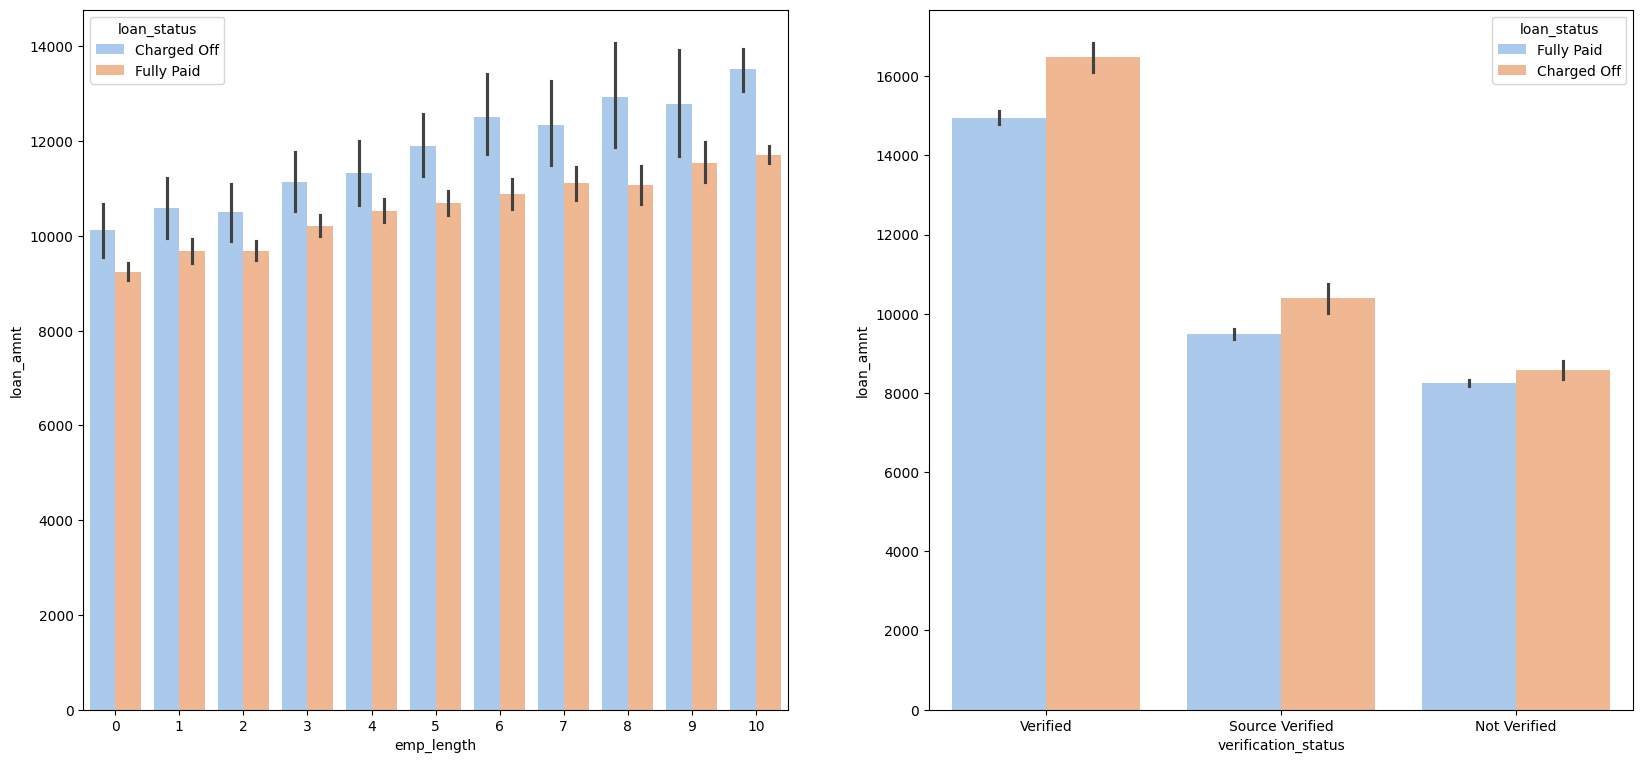

In [1057]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sea.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sea.barplot(data =loan_data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

In [ ]:
#Looking at the verification status data, verified loan applications tend to have higher loan amount. 
#Which might indicate that the firms are first verifying the loans with higher values.


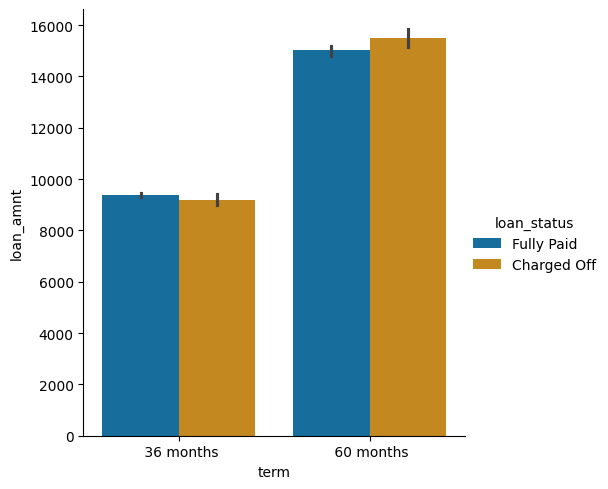

In [1058]:
sea.catplot(x = 'term', y = 'loan_amnt', data = loan_data,hue = 'loan_status', kind = 'bar')


In [ ]:
#More the duration the higher the loan amount

In [ ]:
#Observations
#The chance of defaulting goes up when :
#Applicants taking loan for 'home improvement' and have income of 60k -70k
#Applicants with ownership is 'MORTGAGE and have income of ~65-70k
#Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
#Applicants who have salaries less than 50K and lower interest rates (5-8%) have also defaulted
#Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
#When employment length is 10yrs and loan amount is 12k-14k
#When the loan is verified and loan amount is above 16k
